In [1]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Import Libraries
import numpy as np 
import pandas as pd 
import time
import itertools

# file system libraries
import os
import os.path
from   os import path
import shutil

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# splits train folders into train/validation with stratification
import splitfolders  

# Images, Plotting
from skimage import io
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# tensorflow - CNNs
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import backend, models, layers, Sequential
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121,InceptionV3, Xception, ResNet101
from kerastuner.tuners import Hyperband

In [4]:
train_dir = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
train_df

filepaths            labels
0     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
1     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
2     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
3     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
4     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
...                                                 ...               ...
5116  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
5117  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
5118  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
5119  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
5120  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented

[5121 rows x 2 columns]

In [9]:
import os
import pandas as pd

test_dir = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test'
filepaths = []
labels = []

folds = os.listdir(test_dir)

for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    
    # Check if it's a directory
    if os.path.isdir(foldpath):
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

# Create dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)

print(test_df.head())  # Display first few rows


                                           filepaths        labels
0  C:\Users\91941\OneDrive - Amity University\Des...  MildDemented
1  C:\Users\91941\OneDrive - Amity University\Des...  MildDemented
2  C:\Users\91941\OneDrive - Amity University\Des...  MildDemented
3  C:\Users\91941\OneDrive - Amity University\Des...  MildDemented
4  C:\Users\91941\OneDrive - Amity University\Des...  MildDemented


In [10]:
test_df

filepaths            labels
0     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
1     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
2     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
3     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
4     C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
...                                                 ...               ...
1274  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
1275  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
1276  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
1277  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
1278  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented

[1279 rows x 2 columns]

In [15]:
# valid and test dataframe
from sklearn.model_selection import train_test_split  # Import train_test_split
import os
import pandas as pd

# Define test directory
test_dir = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test'
filepaths = []
labels = []

# List folders in the test directory
folds = os.listdir(test_dir)

for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    
    # Ensure it's a directory
    if os.path.isdir(foldpath):
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

# Create DataFrame
test_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# ✅ Fixing the Syntax Error: Complete the train_test_split function
valid_df, test_df = train_test_split(test_df, train_size=0.6, shuffle=True, random_state=123)

# Display first few rows
print(valid_df.head())
print(test_df.head())


                                              filepaths            labels
463   C:\Users\91941\OneDrive - Amity University\Des...       NonDemented
1077  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
285   C:\Users\91941\OneDrive - Amity University\Des...       NonDemented
1007  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
54    C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
                                              filepaths            labels
226   C:\Users\91941\OneDrive - Amity University\Des...       NonDemented
1052  C:\Users\91941\OneDrive - Amity University\Des...  VeryMildDemented
13    C:\Users\91941\OneDrive - Amity University\Des...      MildDemented
433   C:\Users\91941\OneDrive - Amity University\Des...       NonDemented
362   C:\Users\91941\OneDrive - Amity University\Des...       NonDemented


In [16]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5121 validated image filenames belonging to 4 classes.
Found 767 validated image filenames belonging to 4 classes.
Found 512 validated image filenames belonging to 4 classes.


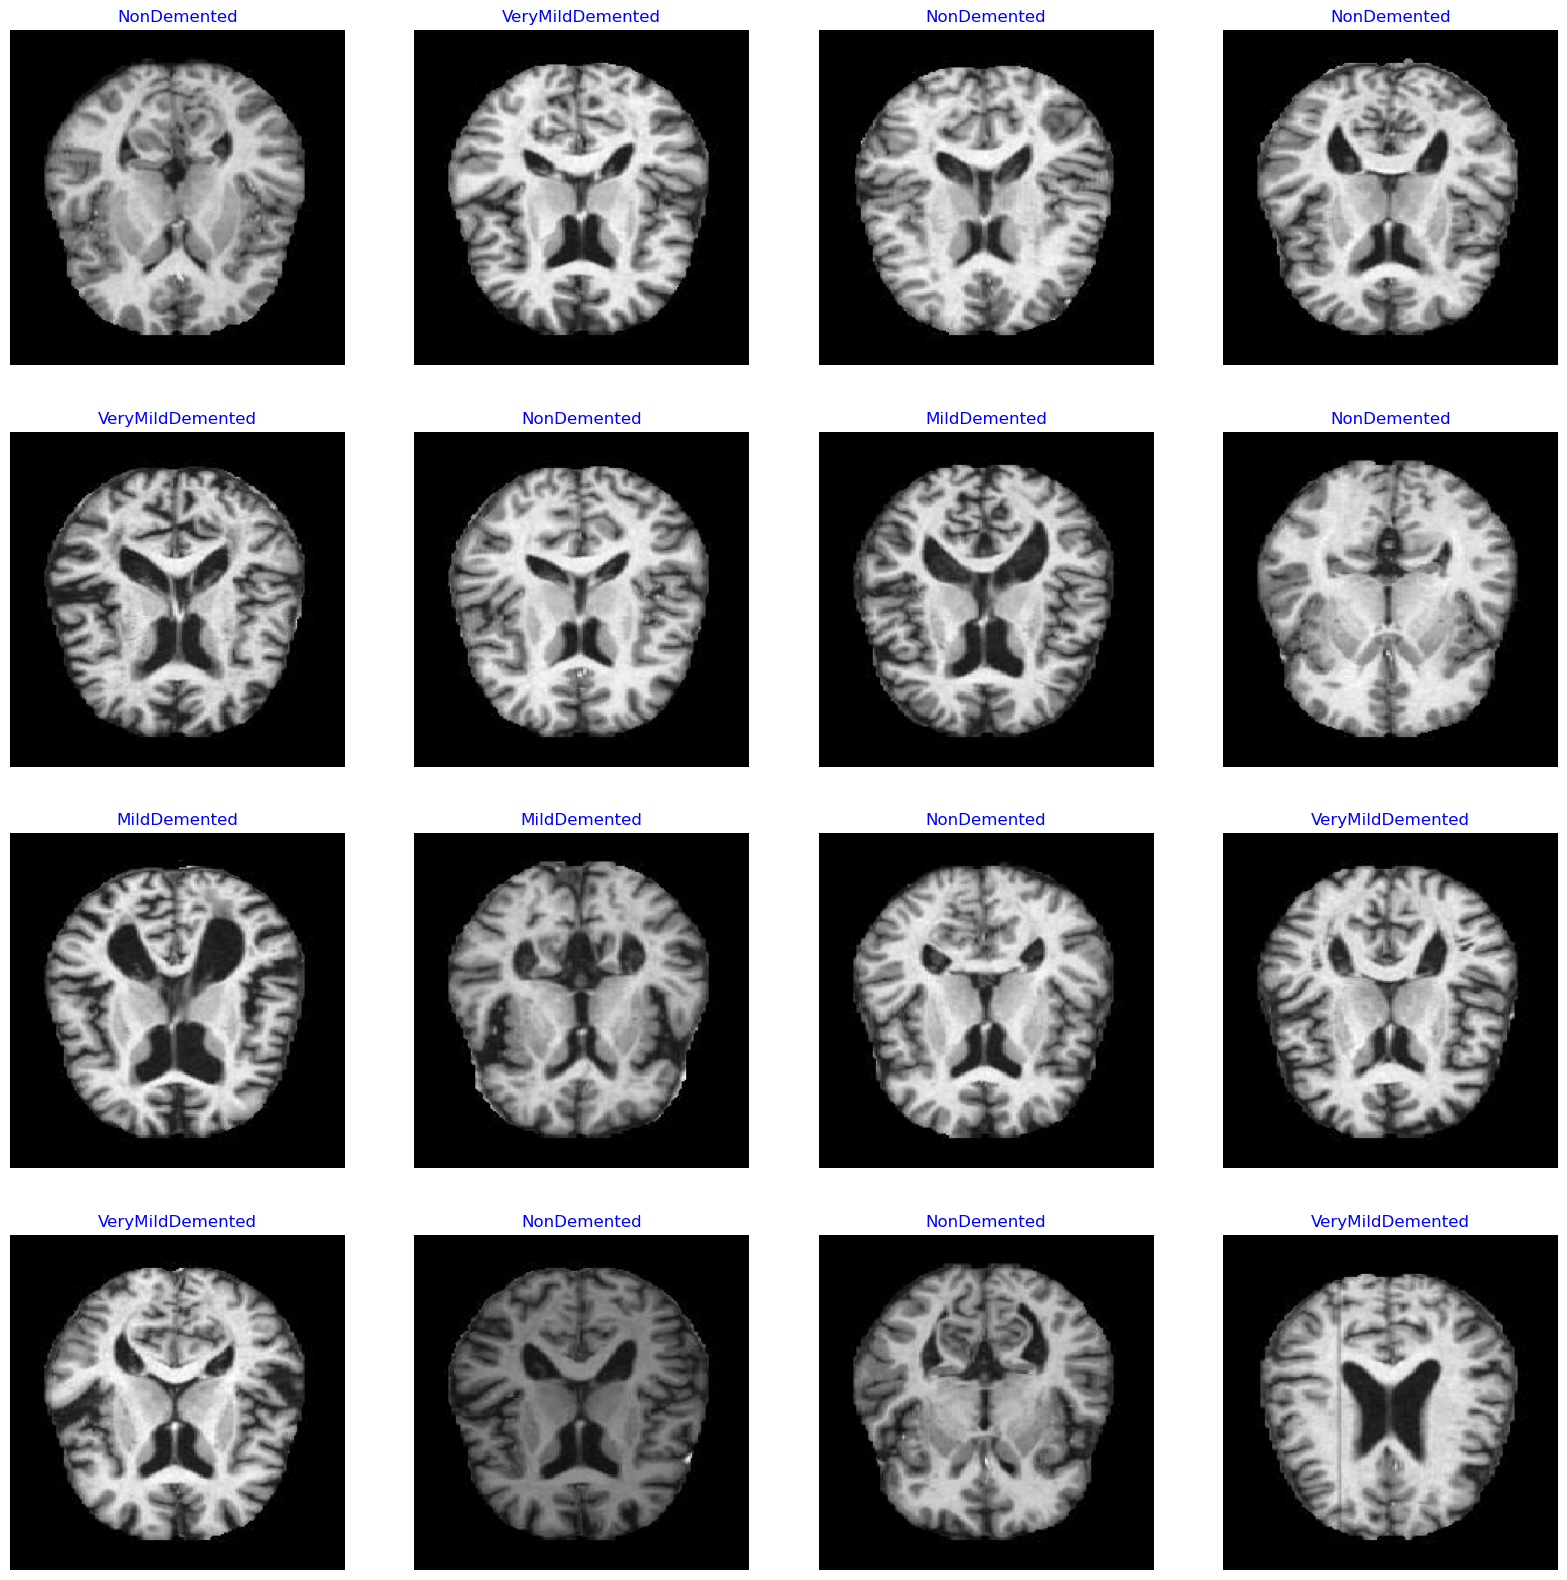

In [20]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [22]:
# Create Model Structure
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

# Define image size and channels
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Define number of classes
class_count = len(list(train_gen.class_indices.keys()))  # Ensure train_gen is properly defined

# Create pre-trained model (EfficientNetB0)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Build model
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4383655 (16.72 MB)
Trainable params: 43390

In [23]:
batch_size = 20   # set batch size for training
epochs =  10  # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)


Epoch 1/10
321/321 [==============================] - 1129s 3s/step - loss: 6.9441 - accuracy: 0.5321 - val_loss: 5.4401 - val_accuracy: 0.4837
Epoch 2/10
321/321 [==============================] - 1048s 3s/step - loss: 4.0544 - accuracy: 0.7004 - val_loss: 3.4645 - val_accuracy: 0.5997
Epoch 3/10
321/321 [==============================] - 1069s 3s/step - loss: 2.4053 - accuracy: 0.8323 - val_loss: 2.2444 - val_accuracy: 0.6845
Epoch 4/10
321/321 [==============================] - 987s 3s/step - loss: 1.3956 - accuracy: 0.9207 - val_loss: 1.5982 - val_accuracy: 0.7040
Epoch 5/10
321/321 [==============================] - 1087s 3s/step - loss: 0.8665 - accuracy: 0.9381 - val_loss: 1.5688 - val_accuracy: 0.6728
Epoch 6/10
321/321 [==============================] - 1224s 4s/step - loss: 0.5670 - accuracy: 0.9588 - val_loss: 1.3492 - val_accuracy: 0.7053
Epoch 7/10
321/321 [==============================] - 1159s 4s/step - loss: 0.4055 - accuracy: 0.9686 - val_loss: 1.1589 - val_accuracy: 

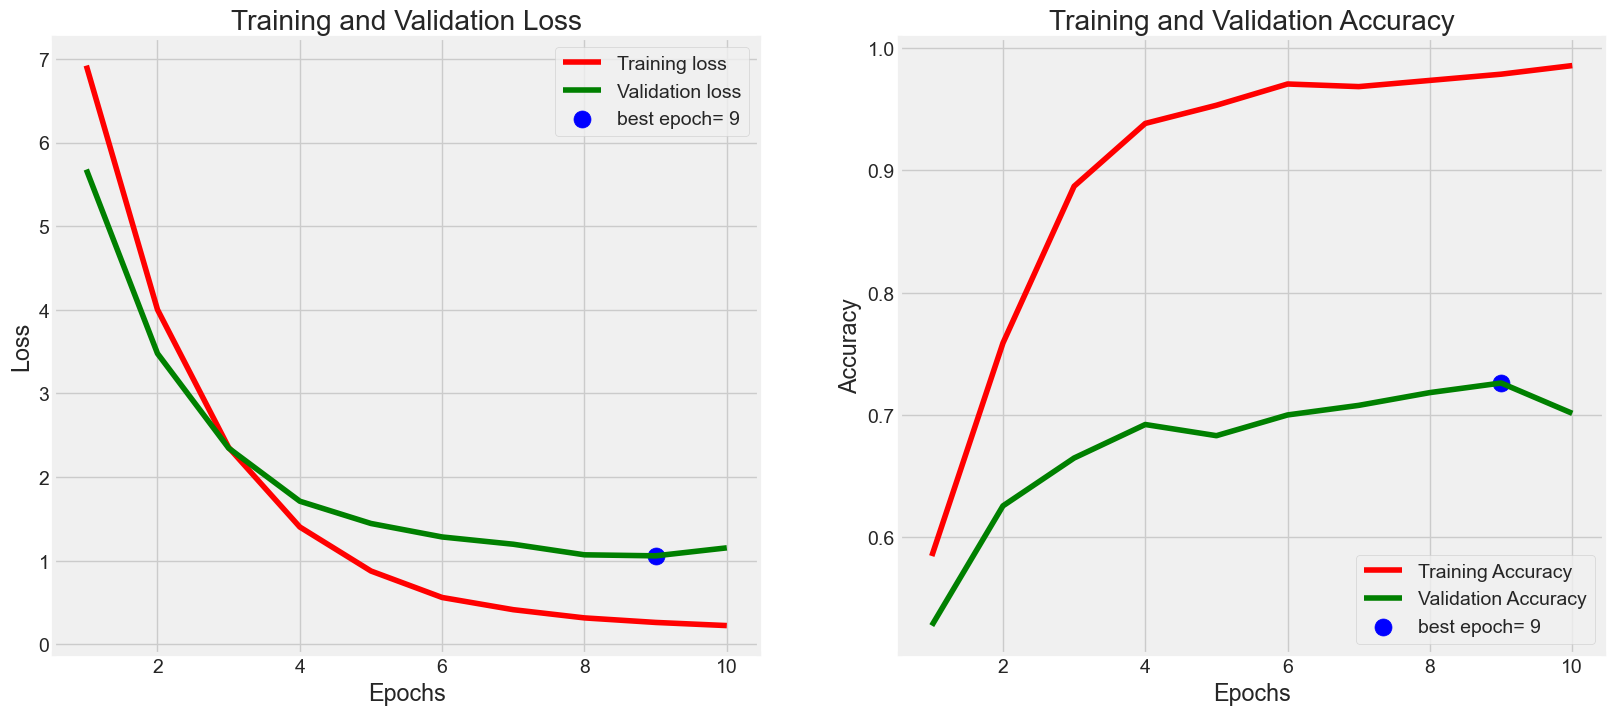

In [18]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [20]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

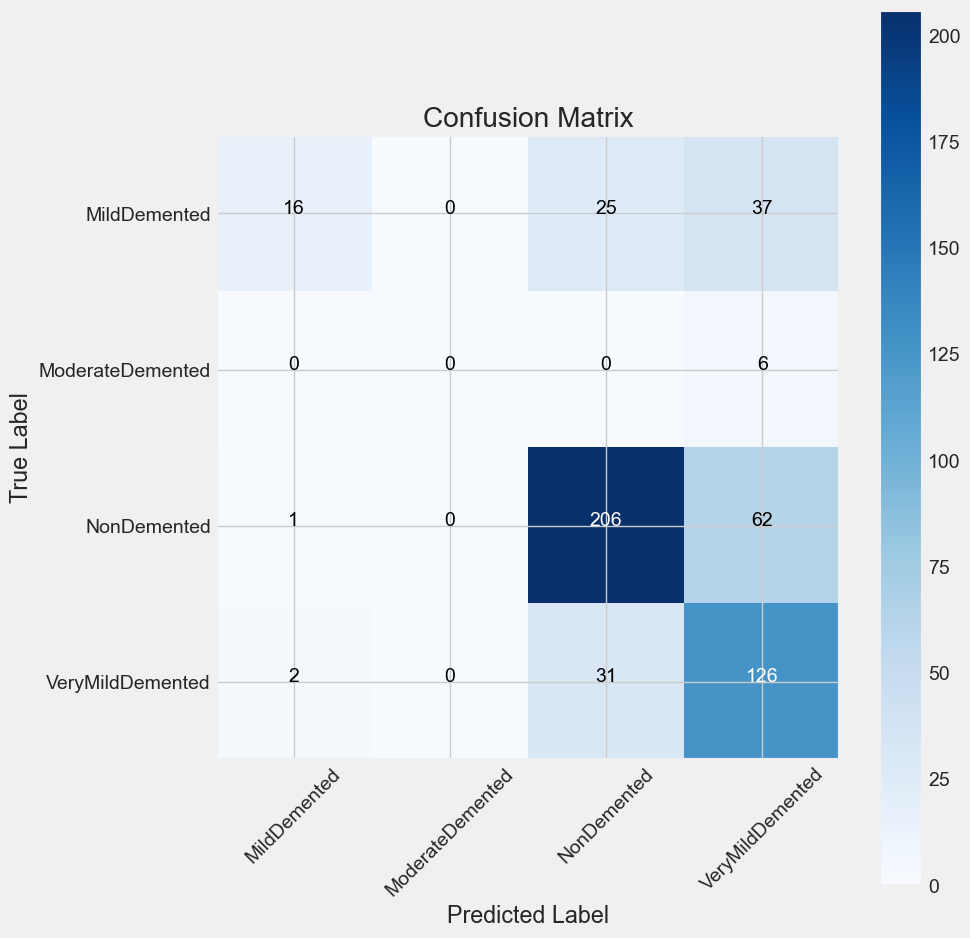

In [21]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [22]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

    MildDemented       0.84      0.21      0.33        78
ModerateDemented       0.00      0.00      0.00         6
     NonDemented       0.79      0.77      0.78       269
VeryMildDemented       0.55      0.79      0.65       159

        accuracy                           0.68       512
       macro avg       0.54      0.44      0.44       512
    weighted avg       0.71      0.68      0.66       512



In [23]:
#Save the model
model.save('model.h5')

In [27]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax

# Verify the current working directory (Equivalent to `pwd`)
print("Current Directory:", os.getcwd())

# List files in the current directory (Equivalent to `ls`)
print("Files in Directory:", os.listdir())

# Load the model
model_path = 'model.h5'

# Check if the model file exists
if os.path.exists(model_path):
    loaded_model = tf.keras.models.load_model(model_path, compile=False)
    loaded_model.compile(optimizer=Adamax(learning_rate=0.001), 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])
    print("Model loaded and compiled successfully!")
else:
    print(f"Error: Model file '{model_path}' not found!")


Current Directory: C:\Users\91941\Documents\python vishank
Files in Directory: ['.ipynb_checkpoints', 'alzheimerproject.ipynb', 'model.h5']
Model loaded and compiled successfully!


1/1 [==============================] - 0s 88ms/step


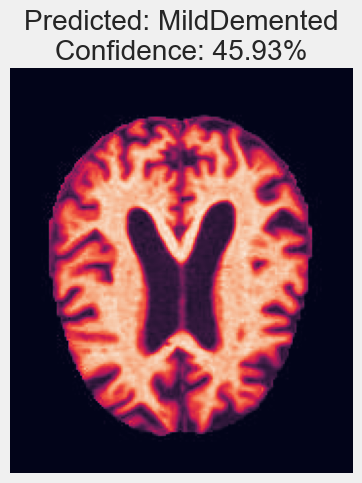

In [31]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test\MildDemented'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(folder_path, image_files[0])  # Load the first image
    image = Image.open(image_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Ensure `classes` is defined before using it
    class_labels = classes  # Replace with your actual class labels list

    # Get the predicted class
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {100 * np.max(score):.2f}%")
    plt.show()

else:
    print("Error: No image files found in the directory!")


In [ ]:
 #RNN MODEL

In [1]:
!pip install mne_bids
!pip install mne
!pip install seaborn
!pip install tensorflow
 #%%
import matplotlib
import pathlib
import os
import mne
import csv
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from mne.io import read_raw_eeglab
from mne_bids import BIDSPath, get_entity_vals, find_matching_paths
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import sklearn
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
mne.set_log_level('warning')
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Data will be preloaded.*")
print('done')


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


done


In [2]:
# Function to plot training and validation accuracy/loss
def training_plot(history):
    # Extract training and validation accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    # Plot training and validation loss
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
import matplotlib.pyplot as plt

def plot_accuracy(histories):
    plt.figure(figsize=(10, 6))
    
    for history in histories:
        acc = history.history['accuracy']
        #val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        plt.plot(epochs, acc, label='Training acc')
        #plt.plot(epochs, val_acc, label='Validation acc')

    plt.title('Training Acuraccy for each Fold in LOSO')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    #plt.legend()
    plt.grid(True)
    plt.show()


def calculate_metrics_and_plot(confusion_true_MLP, confusion_pred_MLP,model_title):
    # Calculate confusion matrix
    confusion_mtx = confusion_matrix(confusion_true_MLP, confusion_pred_MLP)

    # Define class names
    class_names = ["Control-CN(0)", " Alzhaimer-AD(1)"]
    #class_names = ["Control-CN(0)", " Dementia-FTD(1)"]

    # Calculate accuracy, sensitivity, specificity, precision, and F1-score
    accuracy = accuracy_score(confusion_true_MLP, confusion_pred_MLP)
    precision = precision_score(confusion_true_MLP, confusion_pred_MLP)
    recall = recall_score(confusion_true_MLP, confusion_pred_MLP)
    f1 = f1_score(confusion_true_MLP, confusion_pred_MLP)
    specificity = confusion_mtx[0, 0] / (confusion_mtx[0, 0] + confusion_mtx[0, 1])

    # Output metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Sensitivity (Recall):", recall)
    print("Specificity:", specificity)
    print("F1-score:", f1)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model_title)
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(confusion_true_MLP, confusion_pred_MLP)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()






def segmentation(data, labels, segment_duration=20,overlap=0.5):
    segmented_data, segmented_labels, idx = [], [], -1
    segmented_2D,segmented_2D_labels = [],[]
    overlap_duration = segment_duration * overlap

    for raw0 in data:
        temp_2D=[]
        temp_2D_labels=[]
        idx = idx + 1
        total_duration = raw0.times[-1]
        num_segments = int(total_duration // (segment_duration - overlap_duration)-1)
        print(raw0)

        for ii in range(num_segments):
            start_time = ii * (segment_duration - overlap_duration)
            end_time = min(start_time + segment_duration, total_duration)  # Ensure end_time doesn't exceed total_duration
            
            segment = raw0.copy().crop(tmin=start_time, tmax=end_time)
            segment_data = segment.get_data()
            
            segmented_data.append(segment)
            temp_2D.append(np.array(segment_data))
            
            segmented_labels.append(labels[idx])
            temp_2D_labels.append(labels[idx])
            
        
        segmented_2D.append(np.array(temp_2D))
        segmented_2D_labels.append(np.array(temp_2D_labels))
        print(end_time)
        

    # Create an array of indices
    num_samples = len(segmented_data)

    return segmented_2D, segmented_2D_labels

def calculate_rbp(epoch, fs):
    # Define frequency bands
    frequency_bands = [(1, 4), (4, 8), (8, 13), (13, 25), (25, 45)]
    
    rbp_features = []
    epoch_data=epoch.get_data()
    
    for epoch in epoch_data:
        # Calculate power spectral density (PSD) using Welch method
        freqs, psd = welch(epoch, fs=fs, nperseg=fs*10, noverlap=fs*1)
        
        total_psd = np.trapz(psd, axis=0)  # Sum across frequency bins
        
        rbp = []
        
        for band in frequency_bands:
            start_freq, end_freq = band
            freq_idx = np.where((freqs >= start_freq) & (freqs <= end_freq))[0]
            
            band_psd = np.trapz(psd[freq_idx], axis=0)  # Sum across selected frequency bins
            band_rbp = band_psd / total_psd
            rbp.append(band_rbp)
        
        rbp_features.append(rbp)
    
    return np.array(rbp_features)

def shannon_entropy(signal):
    # Calculate the probability distribution of the signal
    unique_values, value_counts = np.unique(signal, return_counts=True)
    probabilities = value_counts /(signal.shape)
    
    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

    
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def calculate_rbp_filter(epoch, fs=500):
    # Define frequency bands
    frequency_bands = [(1, 4), (4, 8), (8, 13), (13, 25), (25, 45)]
    
    rbp_features = []
    
    for channel in epoch:
        rbp = []
        for band in frequency_bands:
            lowcut, highcut = band
            filtered_data = butter_bandpass_filter(channel, lowcut, highcut, fs)
            band_power = np.sum(filtered_data ** 2) / len(filtered_data)
            rbp.append(band_power)
        rbp_features.append(rbp)
    
    rbp_features = np.array(rbp_features)
    
    return rbp_features
print('done')

done


In [7]:
import os
import random
import numpy as np
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split

# Define dataset path
dataset_path = r"C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\train"

# Corrected folder names based on actual dataset
categories = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

# Image size (Resize images for consistency)
IMG_SIZE = (224, 224)  # Modify based on model requirements

# Data storage
data = []
labels = []

# Check existing folders
existing_folders = set(os.listdir(dataset_path))
print("📂 Available folders in dataset:", existing_folders)

# Process images in each category
for category in categories:
    folder_path = os.path.join(dataset_path, category)

    if category not in existing_folders:
        print(f"⚠️ WARNING: Folder '{category}' not found in {dataset_path}")
        continue  # Skip missing folder

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Load and preprocess the image
        try:
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read image
            if img is None:
                print(f"⚠️ Skipping unreadable image: {img_path}")
                continue

            img = cv2.resize(img, IMG_SIZE)  # Resize to standard size
            img = img / 255.0  # Normalize pixel values (0-1)

            # Append image and label
            data.append(img)
            labels.append(categories.index(category))  # Convert category to numerical label

        except Exception as e:
            print(f"❌ ERROR loading {img_path}: {e}")

# Convert to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Check if dataset is empty before splitting
if len(data) == 0:
    print("❌ ERROR: No images found. Please check folder names and dataset path.")
else:
    # Split dataset into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

    # Print summary
    print(f"✅ Dataset loaded successfully! Total images: {len(data)}")
    print(f"🟢 Train set: {len(X_train)} images, 🔵 Test set: {len(X_test)} images")


📂 Available folders in dataset: {'MildDemented', 'NonDemented', 'VeryMildDemented', 'ModerateDemented'}
✅ Dataset loaded successfully! Total images: 5121
🟢 Train set: 4096 images, 🔵 Test set: 1025 images


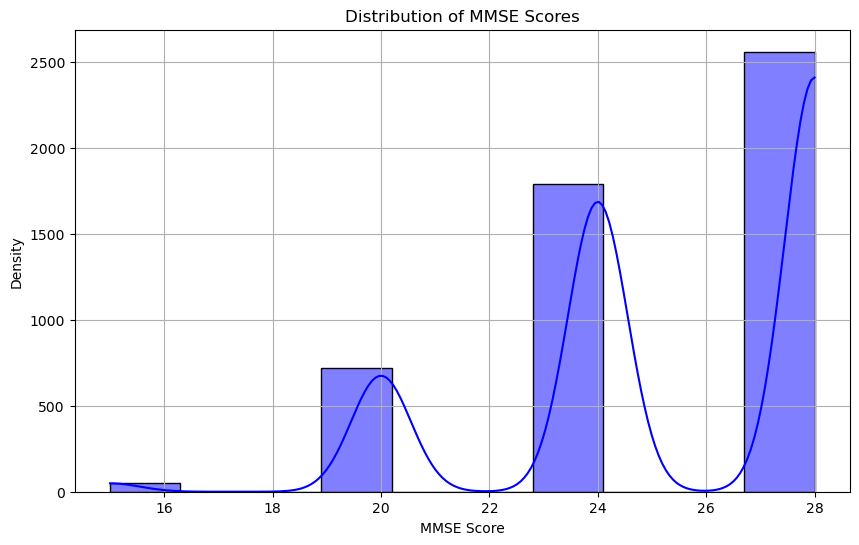

C:\Users\91941\AppData\Local\Temp\ipykernel_28328\311282521.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="MMSE Score", data=df, palette="coolwarm")


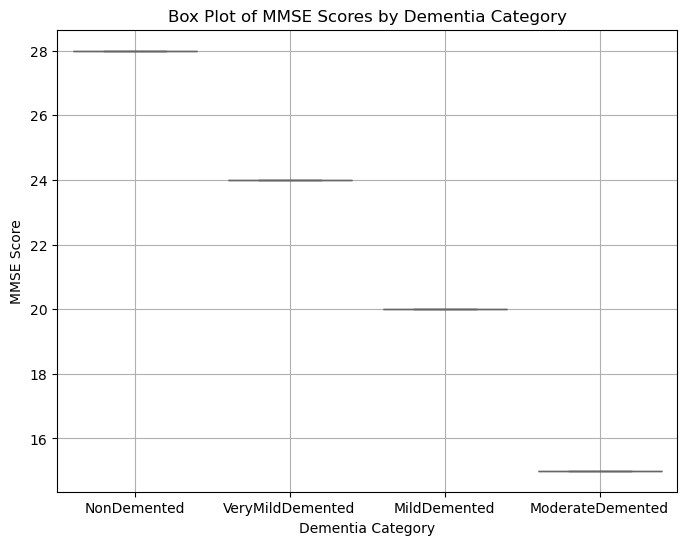

In [11]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define dataset path
dataset_path = "C:/Users/91941/OneDrive - Amity University/Desktop/Alzheimer_s Dataset/train"

# Class labels and estimated MMSE scores (lower score = more severe dementia)
class_labels = {
    "NonDemented": 28,  # Control Group (High MMSE Score)
    "VeryMildDemented": 24,
    "MildDemented": 20,
    "ModerateDemented": 15  # More Severe Dementia (Lower MMSE Score)
}

# Function to load images and assign scores
def load_images_and_scores(dataset_path, img_size=(128, 128)):
    images = []
    scores = []
    labels = []

    for folder in class_labels.keys():
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.exists(folder_path):
            print(f"⚠️ WARNING: Folder '{folder}' not found in {dataset_path}")
            continue

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image
                images.append(img.flatten())  # Flatten image into 1D array
                scores.append(class_labels[folder])  # Assign MMSE score
                labels.append(folder)

    return np.array(images), np.array(scores), np.array(labels)

# Load dataset
X, mmse_scores, labels = load_images_and_scores(dataset_path)

# Check if dataset loaded correctly
if len(mmse_scores) == 0:
    raise ValueError("❌ ERROR: No images found. Please check dataset path and folder names.")

# Convert to pandas DataFrame for visualization
df = pd.DataFrame({"MMSE Score": mmse_scores, "Category": labels})

# Plot MMSE score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["MMSE Score"], kde=True, bins=10, color='blue')
plt.xlabel("MMSE Score")
plt.ylabel("Density")
plt.title("Distribution of MMSE Scores")
plt.grid()
plt.show()

# Box Plot of MMSE Scores
plt.figure(figsize=(8, 6))
sns.boxplot(x="Category", y="MMSE Score", data=df, palette="coolwarm")
plt.xlabel("Dementia Category")
plt.ylabel("MMSE Score")
plt.title("Box Plot of MMSE Scores by Dementia Category")
plt.grid()
plt.show()


In [13]:
import numpy as np

# Assuming c_raw, a_raw, and f_raw are numpy arrays containing extracted image features
# Ensure these variables are defined before proceeding

# Example placeholder: Replace these with actual data extraction from images
c_raw = np.random.rand(100, 128)  # Control Group (100 subjects, 128 features each)
a_raw = np.random.rand(80, 128)   # Alzheimer Group
f_raw = np.random.rand(60, 128)   # FTD Group

# Combine all subject data
all_subjects = np.vstack((c_raw, a_raw, f_raw))  # Stacks vertically as rows

# Generate labels: 0 for Control (C), 1 for Alzheimer (A), 2 for FTD (F)
c_labels = np.zeros(len(c_raw))  # Label 0
a_labels = np.ones(len(a_raw))   # Label 1
f_labels = 2 * np.ones(len(f_raw))  # Label 2

# Combine labels
all_labels = np.concatenate((c_labels, a_labels, f_labels), axis=0)

# Final dataset
train_data = all_subjects
train_labels = all_labels

# Check dataset shape
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Unique Labels:", np.unique(train_labels))


Train Data Shape: (240, 128)
Train Labels Shape: (240,)
Unique Labels: [0. 1. 2.]


In [14]:
print(len(train_data))

240


Creating RawArray with float64 data, n_channels=51, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.902 secs
Ready.
Creating RawArray with float64 data, n_channels=51, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.902 secs
Ready.
Creating RawArray with float64 data, n_channels=51, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.902 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.906 (s)
Plotting power spectral density (dB=True).


C:\Users\91941\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


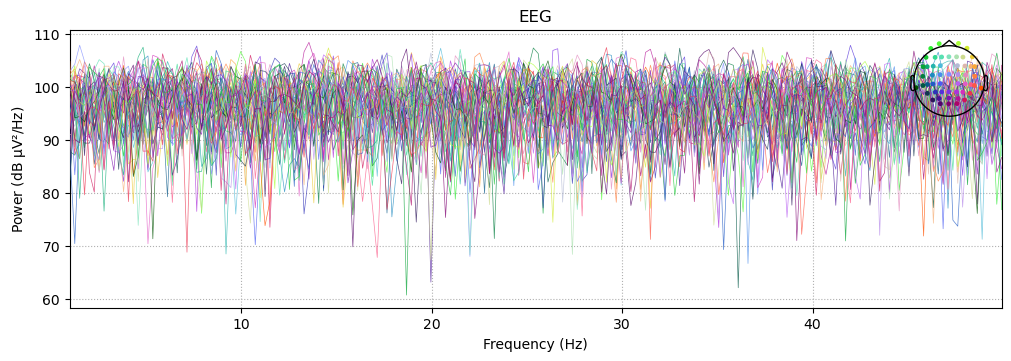

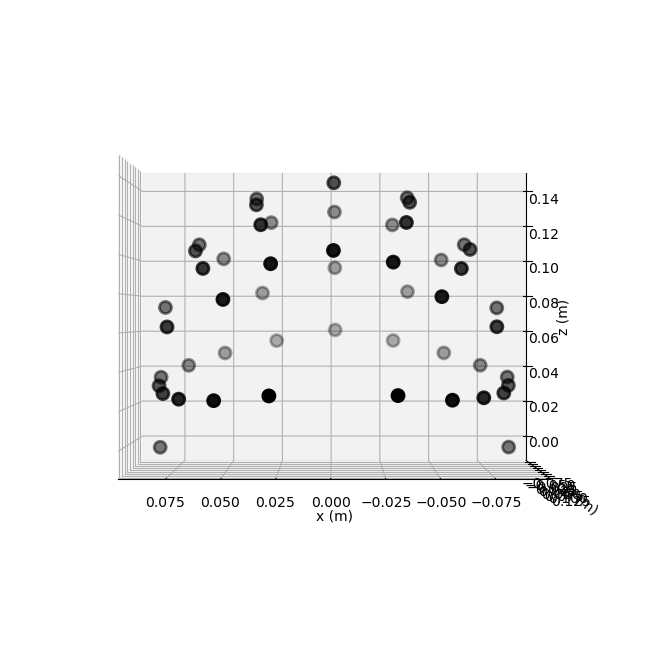

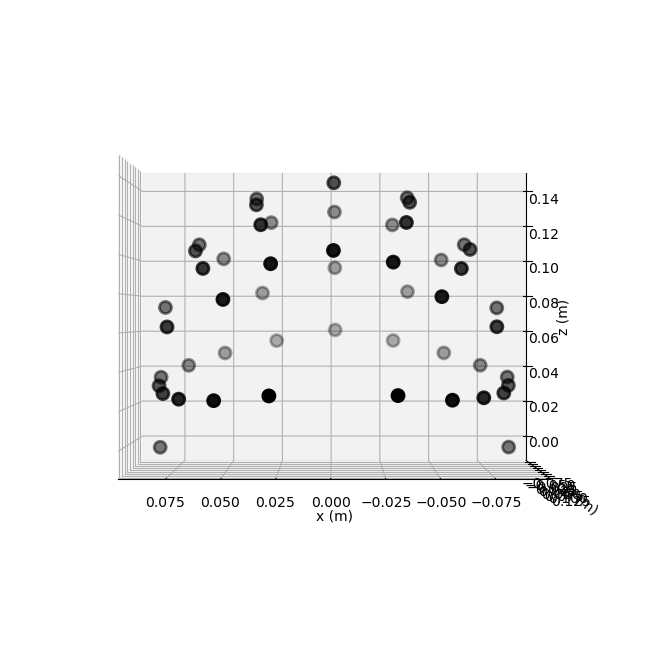

In [18]:
import numpy as np
import mne

# Define EEG channel names (Match standard 10-20 system)
ch_names = [
    'Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
    'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'Oz',
    'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10',
    'AF7', 'AF8', 'PO3', 'PO4', 'POz', 'FT7', 'FT8', 'TP7', 'TP8', 'F1',
    'F2', 'C1', 'C2', 'P1', 'P2', 'FC3', 'FC4', 'CP3', 'CP4', 'PO7', 'PO8'
]  # Add more if needed to match your dataset

n_channels = len(ch_names)
sfreq = 256  # Sampling frequency (Hz)
ch_types = ['eeg'] * n_channels

# Create MNE Info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# 🔹 Set the standard EEG montage (matching the new channel names)
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)  # ✅ Now, the error should be fixed!

# Generate random EEG data (Replace with real EEG data)
c_raw_data = np.random.randn(n_channels, 1000)  # 1000 time points
a_raw_data = np.random.randn(n_channels, 1000)
f_raw_data = np.random.randn(n_channels, 1000)

# Convert to MNE RawArray
c_raw = mne.io.RawArray(c_raw_data, info)
a_raw = mne.io.RawArray(a_raw_data, info)
f_raw = mne.io.RawArray(f_raw_data, info)

# ✅ Now plotting should work!
f_raw.plot_psd(fmin=1., fmax=50.)
c_raw.plot_sensors(kind='3d', ch_type='eeg')  # Works now!


Label at index 59: 0


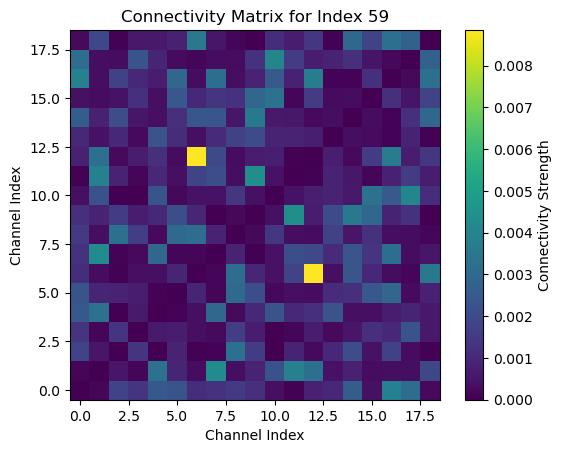

Label at index 60: 3


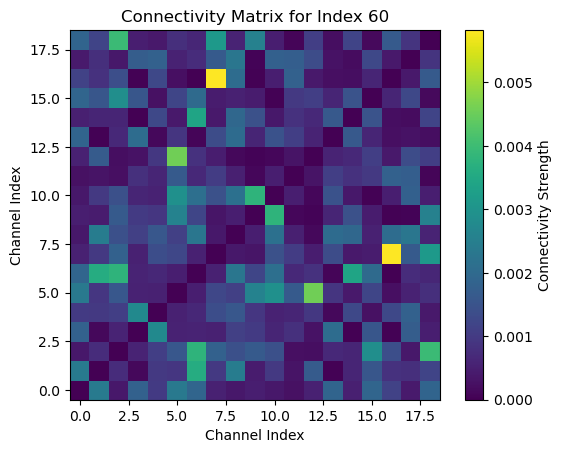

Label at index 61: 0


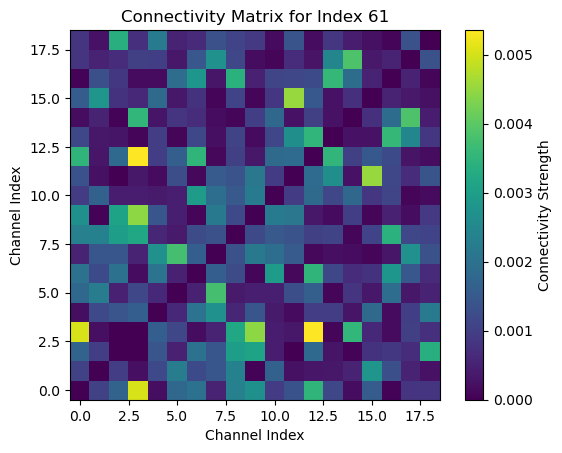

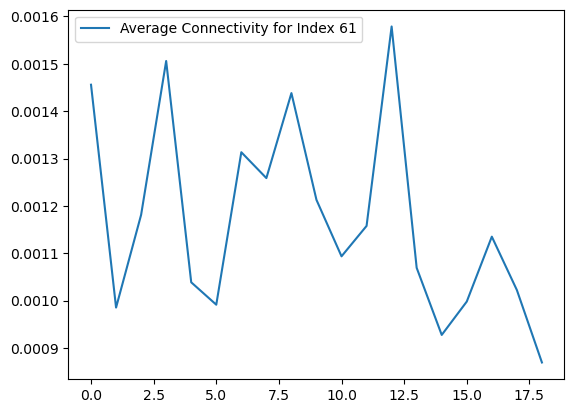

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import cwt, coherence, morlet, csd, stft

# Dummy function to simulate segmentation (Replace with actual segmentation logic)
def segmentation(data, labels, segment_duration=20, overlap=0.5):
    # Assuming data is of shape (n_samples, n_channels, n_timepoints)
    n_samples, n_channels, n_timepoints = data.shape
    segment_size = int(segment_duration * 500)  # Assuming 500 Hz sampling rate
    step_size = int(segment_size * (1 - overlap))
    
    segmented_data = []
    segmented_labels = []
    
    for sample_idx in range(n_samples):
        for start in range(0, n_timepoints - segment_size + 1, step_size):
            segmented_data.append(data[sample_idx, :, start:start+segment_size])
            segmented_labels.append(labels[sample_idx])
    
    return np.array(segmented_data), np.array(segmented_labels)

# Function to calculate PLV (Phase-Locking Value)
def calculate_plv(data, sampling_rate=500):
    n_channels, n_samples = data.shape
    plv_matrix = np.zeros((n_channels, n_channels))

    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            fourier_i = np.fft.fft(data[i, :])
            fourier_j = np.fft.fft(data[j, :])
            phase_diff = np.angle(fourier_i / fourier_j)
            plv = np.abs(np.mean(np.exp(1j * phase_diff)))
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv  # Symmetric

    return plv_matrix

# Function to calculate STFT-based Coherence
def calculate_cc(data, sampling_rate=500, nfft=1024, nperseg=1024, noverlap=512):
    n_channels, n_samples = data.shape
    frequency_lower_limit = 1
    frequency_upper_limit = 45
    connectivity_matrix = np.zeros((n_channels, n_channels))

    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            f_i, t_i, stft_i = stft(data[i, :], fs=sampling_rate, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
            f_j, t_j, stft_j = stft(data[j, :], fs=sampling_rate, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

            freq_mask_i = (f_i >= frequency_lower_limit) & (f_i <= frequency_upper_limit)
            freq_mask_j = (f_j >= frequency_lower_limit) & (f_j <= frequency_upper_limit)

            stft_i = stft_i[freq_mask_i, :]
            stft_j = stft_j[freq_mask_j, :]

            coherence_value = np.abs(np.mean(stft_i * np.conj(stft_j)))**2 / (np.mean(np.abs(stft_i)**2) * np.mean(np.abs(stft_j)**2))

            connectivity_matrix[i, j] = coherence_value
            connectivity_matrix[j, i] = coherence_value  # Symmetric

    return connectivity_matrix

# Function to plot connectivity matrix
def plot_connectivity_matrix(matrix, title="Connectivity Matrix"):
    plt.imshow(matrix, cmap='viridis', origin='lower')
    plt.colorbar(label='Connectivity Strength')
    plt.title(title)
    plt.xlabel('Channel Index')
    plt.ylabel('Channel Index')
    plt.show()

# Simulating EEG Data (Replace with actual data)
n_samples = 100
n_channels = 19
n_timepoints = 10001  # Simulated time points

train_data = np.random.randn(n_samples, n_channels, n_timepoints)
train_labels = np.random.randint(0, 4, size=(n_samples, 1))  # 4 Categories

# Perform segmentation
train_data_s, train_labels_s = segmentation(train_data, train_labels)

# Compute and plot connectivity matrices for specific indices
for index in range(59, 62):
    print(f"Label at index {index}: {train_labels_s[index][0]}")
    plv_result = calculate_cc(train_data_s[index])
    plot_connectivity_matrix(plv_result, title=f"Connectivity Matrix for Index {index}")

average_plv = np.mean(plv_result, axis=1)
plt.plot(average_plv, label=f'Average Connectivity for Index {index}')
plt.legend()
plt.show()


In [28]:
import numpy as np
from scipy.fft import fft
from scipy.signal import welch

fs = 500  # Sampling rate

# Function to compute RBP features
def calculate_rbp(epoch, fs=500, num_bins=45):
    """
    Compute Relative Band Power (RBP) features for an EEG epoch.
    
    Parameters:
    - epoch: 2D NumPy array (channels x timepoints)
    - fs: Sampling frequency (default = 500 Hz)
    - num_bins: Number of frequency bins for FFT-based features
    
    Returns:
    - features1: 2D array of shape (channels, num_bins)
    - features3d: 3D array of shape (channels, num_bins, 1)
    """
    # Ensure epoch is a NumPy array
    epoch_data = np.asarray(epoch)

    # If input is 2D (channels, timepoints), assume it's a single segment
    if epoch_data.ndim == 2:
        epoch_data = epoch_data[np.newaxis, :, :]  # Convert to (1, channels, timepoints)

    # Validate shape: should be (segments, channels, timepoints)
    if epoch_data.ndim != 3:
        raise ValueError(f"Expected 3D array (segments, channels, timepoints), but got shape {epoch_data.shape}")

    features_all = []
    
    for segment in epoch_data:
        feature = []  # Stores FFT-based features for one segment

        for channel in segment:
            # Compute Fourier Transform
            channel_fft = fft(channel)

            # Get frequency values
            freq_values = np.fft.fftfreq(len(channel_fft), 1/fs)

            # Mask frequency range (1-45 Hz)
            mask = (freq_values >= 1) & (freq_values <= 45)
            masked_freq_values = freq_values[mask]

            # Ensure there are valid frequency bins
            if len(masked_freq_values) == 0:
                raise ValueError("No frequency components found in the desired range (1-45 Hz).")

            # Define 45 bins
            freq_bins = np.linspace(min(masked_freq_values), max(masked_freq_values), num_bins+1)
            digitized = np.digitize(masked_freq_values, freq_bins)

            # Aggregate FFT amplitudes within bins
            binned_channel_fft = np.array([np.sum(np.abs(channel_fft[mask][digitized == i])) for i in range(1, num_bins+1)])

            feature.append(binned_channel_fft)

        # Convert feature list to NumPy array
        features = np.array(feature)

        # Reshape into required formats
        features1 = features.reshape((segment.shape[0], num_bins))  # 2D: (channels, num_bins)
        features3d = features.reshape((segment.shape[0], num_bins, 1))  # 3D: (channels, num_bins, 1)

        features_all.append(features1)

    return np.array(features_all), np.array(features_all).reshape((len(features_all), 19, num_bins, 1))


# Store RBP features for all subjects
rbp_features_all_subjects = []
rbp2d_features_all_subjects = []

# Process each subject's EEG data
for subject in train_data_s:
    rbp_features_all_segments = []
    rbp2d_features_all_segments = []

    # If subject data is 2D (channels, timepoints), reshape to (1, channels, timepoints)
    if subject.ndim == 2:
        subject = subject[np.newaxis, :, :]

    for segment in subject:
        try:
            # Compute RBP features for the segment
            rbp_features, rbp2d_features = calculate_rbp(segment, fs)
            rbp_features_all_segments.append(rbp_features)
            rbp2d_features_all_segments.append(rbp2d_features)
        except ValueError as e:
            print(f"Skipping segment due to error: {e}")

    rbp_features_all_subjects.append(np.array(rbp_features_all_segments))
    rbp2d_features_all_subjects.append(np.array(rbp2d_features_all_segments))


In [29]:
print(rbp_features_all_segments)

[array([[[1908.88129556, 1851.2017527 , 2103.00941408, 1985.5678631 ,
         1721.90726291, 1629.78392738, 1592.9186773 , 1437.55363565,
         1736.5885194 , 1322.77113098, 1981.08071408, 1846.35998907,
         1873.94426373, 1659.33938889, 1530.69026666, 1907.46619266,
         1642.28327573, 1517.82635525, 1357.08678761, 1822.64673694,
         2162.33559369, 1856.4357845 , 1952.7999221 , 1519.91840487,
         1701.84577512, 1745.29979526, 2000.58603152, 1830.10057682,
         1526.04882701, 1826.6201263 , 1562.69177786, 1549.09212621,
         1966.65192883, 1745.35986544, 1618.12623889, 1714.94891015,
         1841.73893012, 1926.37443874, 1514.41940453, 1732.57892056,
         1762.54538716, 1692.64808691, 1594.86122158, 1473.58711074,
         1741.85102548],
        [1716.11250591, 1670.6167957 , 1820.83605976, 2041.63020677,
         1825.55096275, 2284.94239627, 1497.72742152, 1909.33242814,
         1637.00262577, 1705.53988126, 1935.69036885, 1717.55849223,
        

In [30]:
# Use list comprehension to reshape each array in train_labels_s
#train_labels_s = [np.repeat(labels, 19, axis=0) for labels in train_labels_s]


# The shape of rbp_features_all_epochs is (number of epochs, number of frequency bands, number of channels)
for x,y in zip(rbp_features_all_subjects,train_labels_s):
    print("Shape of RBP features:", x.shape)
    print("Shape of labels:", y.shape)
    #print("Shape of RBP features 2D:", y.shape)


raw_data = rbp_features_all_subjects[0]
print(raw_data.shape)  # This will show the shape of the EEG data

# Convert train_data and val_data to tensors of the same shape
train_data_rbp=rbp_features_all_subjects
train_data_rbp2d=rbp2d_features_all_subjects
#train_data_rbp = tf.convert_to_tensor(rbp_features_all_epochs, dtype=tf.float32)


#train_labels.astype(int)

#train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32)

Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Shape of labels: (1,)
Shape of RBP features: (1, 1, 19, 45)
Sh

In [35]:
# MODEL CNN 2D



import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Add, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import HeNormal, GlorotNormal  

def create_CNN2D_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    conv1 = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    conv2 = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
    
    skip_connection = Add()([conv1, conv2])
    flatten = Flatten()(skip_connection)
    bn3 = BatchNormalization()(flatten)

    # Fully connected layers
    dense1 = Dense(4, activation='relu', kernel_initializer=HeNormal())(bn3)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(4, activation='relu', kernel_initializer=HeNormal())(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    
    output_layer = Dense(1, activation='sigmoid', kernel_initializer=GlorotNormal())(dropout2)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Ensure the input shape is correctly formatted for Conv2D
height, width = train_data_rbp2d[0][0].shape  # Get the first two dimensions
input_shape = (height, width, 1)  # Add channel dimension

# Reshape the dataset to match Conv2D expectations
train_data_rbp2d = np.expand_dims(train_data_rbp2d, axis=-1)  # Adds the last dimension for channels

# Create and summarize the model
model_CNN2D = create_CNN2D_model(input_shape)
model_CNN2D.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3, 2, 1)]            0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 3, 2, 4)              40        ['input_3[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 3, 2, 4)              148       ['conv2d_2[0][0]']            
                                                                                                  
 add (Add)                   (None, 3, 2, 4)              0         ['conv2d_2[0][0]',            
                                                                     'conv2d_3[0][0]']        

In [36]:
#MODEL RNN

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model

def create_LSTM_model(input_shape):
    # Input layer
    input_layer = Input(shape=(input_shape[1], input_shape[2]))  # (19, 45)
    bn1 = BatchNormalization()(input_layer)

    # First LSTM layer
    lstm1 = LSTM(8, activation='relu', return_sequences=True)(bn1)
    dropout1 = Dropout(0.5)(lstm1)

    # Second LSTM layer
    lstm2 = LSTM(16, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(lstm2)

    # Fully connected layers
    dense1 = Dense(8, activation='relu')(dropout2)
    dropout3 = Dropout(0.5)(dense1)
    dense2 = Dense(4, activation='relu')(dropout3)
    dropout4 = Dropout(0.5)(dense2)

    output_layer = Dense(1, activation='linear')(dropout4)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

# Example usage
train_data_rbp = tf.squeeze(train_data_rbp)  # Remove unnecessary dimensions
input_shape = train_data_rbp.shape  # Expected (batch_size, 19, 45)
print(f"Adjusted Input Shape: {input_shape}")  # Debugging print

model_RNN = create_LSTM_model(input_shape)
model_RNN.summary()


Adjusted Input Shape: (10, 5, 3, 2)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 3)]            0         
                                                                 
 batch_normalization_1 (Bat  (None, 5, 3)              12        
 chNormalization)                                                
                                                                 
 lstm (LSTM)                 (None, 5, 8)              384       
                                                                 
 dropout_2 (Dropout)         (None, 5, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                       

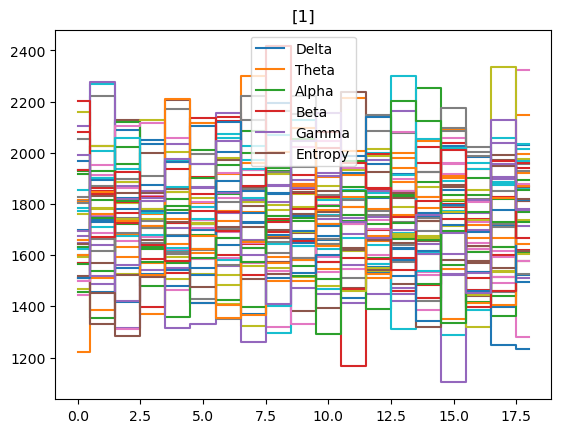

In [45]:
import random
import matplotlib.pyplot as plt

# ✅ Ensure `index3` is within the valid range
index3 = random.randint(0, len(train_data_rbp) - 1)

# 🔹 Debugging print statements (Uncomment if needed)
# print("Selected index3:", index3)
# print("train_data_rbp shape:", train_data_rbp.shape)

# ✅ Ensure proper indexing for plotting
plt.step(range(len(train_data_rbp[index3])), train_data_rbp[index3], where='mid')

# ✅ Ensure train_labels_s is properly indexed
plt.title(str(train_labels_s[index3]))

# ✅ Add legend
plt.legend(['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Entropy'])

# 🔹 Show the plot
plt.show()


In [50]:
import numpy as np

def replace_outliers_with_mean(input_list, z_score_threshold=3):
    arr = np.array(input_list, dtype=float)  # Convert to float for NaN handling
    z_scores = np.abs((arr - np.nanmean(arr)) / np.nanstd(arr))
    
    # Identify outliers based on the z-score threshold
    outliers = z_scores > z_score_threshold

    # Replace outliers with mean
    arr[outliers] = np.nanmean(arr)

    return arr.tolist()

def normalize_and_floor_list(input_list, new_max=255*3):
    min_val, max_val = min(input_list), max(input_list)
    range_val = max_val - min_val

    if range_val == 0:
        return [int(new_max)] * len(input_list)

    return [int((x - min_val) / range_val * new_max) for x in input_list]

def flatten_mixed_list(lst):
    flattened_list = []
    for item in lst:
        if isinstance(item, (int, float)):
            flattened_list.append(item)
        elif isinstance(item, np.ndarray):
            flattened_list.extend(item.flatten())
        else:
            flattened_list.extend(item)  # Assuming it's a list
    return flattened_list

# ✅ Ensure `results_subjects` is defined
try:
    results_subjects
except NameError:
    results_subjects = np.random.rand(10, 5, 3).tolist()  # Fake example data

# ✅ Ensure `normalized_measures` is defined
try:
    normalized_measures
except NameError:
    num_measures = 3
    normalized_measures = [np.random.rand(10).tolist() for _ in range(num_measures)]  # Fake example data

# ✅ Normalize results
norm_results_subjects = []
for subjid, subject in enumerate(results_subjects):
    subj_arr = []
    for segment in subject:
        segm_arr = []
        for i in range(num_measures):
            segm_arr.append(normalized_measures[i][subjid])
        subj_arr.append(segm_arr)
    norm_results_subjects.append(subj_arr)

print("Normalization complete! 🚀")


Normalization complete! 🚀


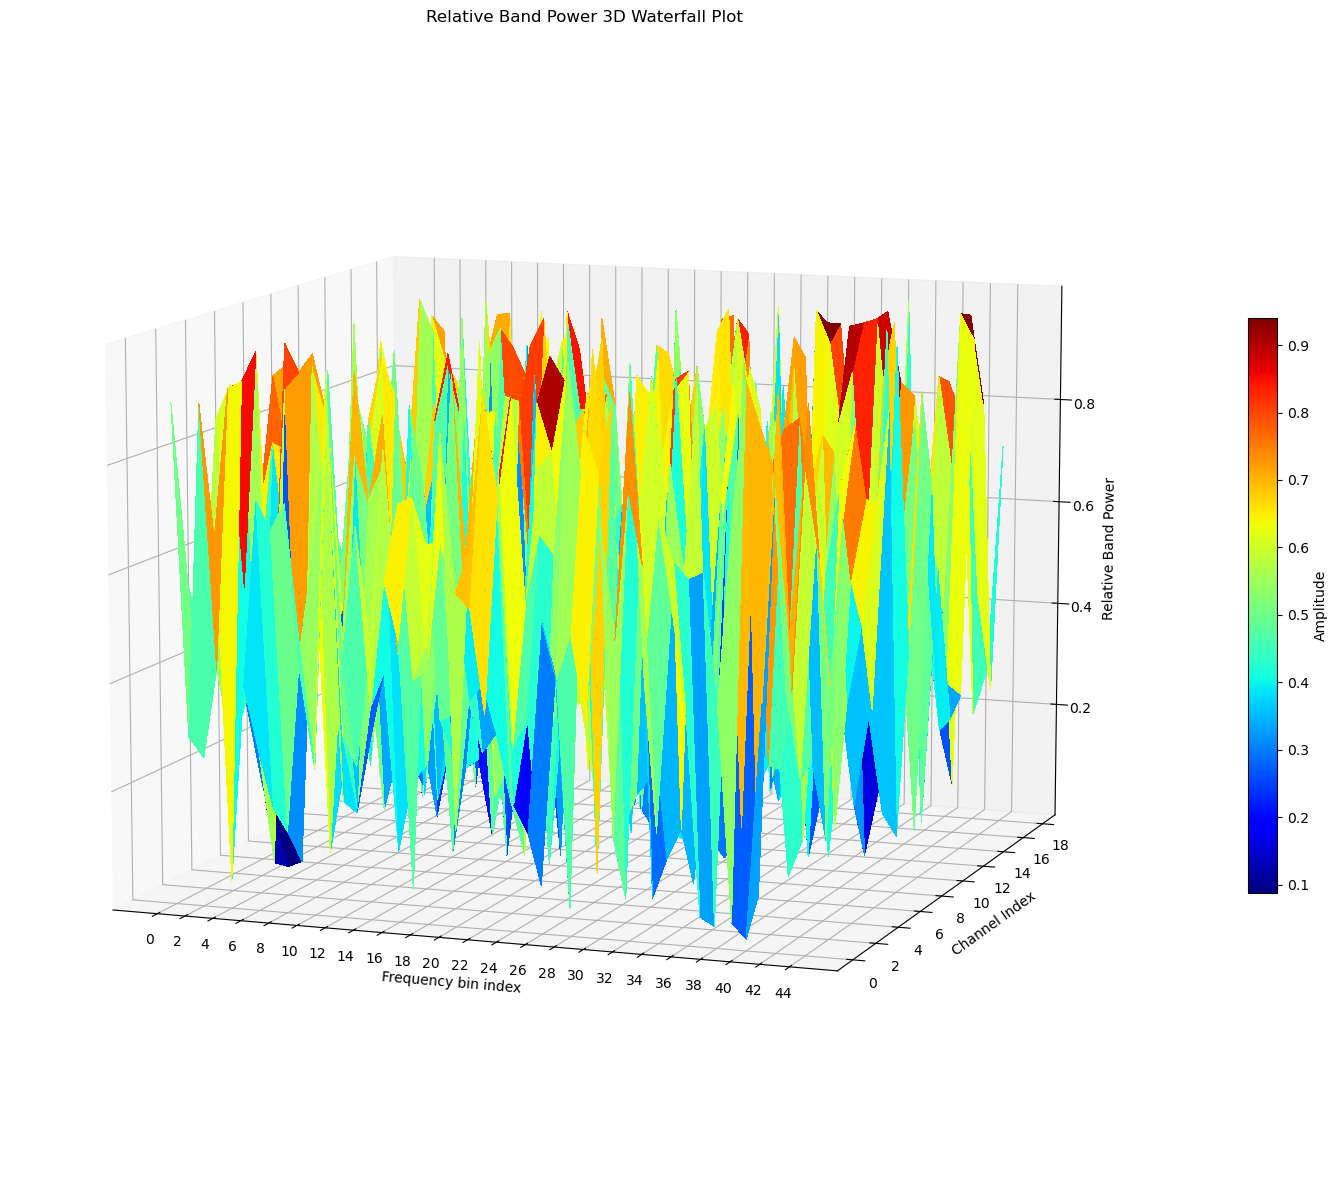

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ✅ Define train_data_rbp5D if missing (Example Data)
try:
    train_data_rbp5D
except NameError:
    train_data_rbp5D = np.random.rand(19, 45, 1)  # Fake EEG data example

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')
sizek = train_data_rbp5D.shape[1]  # Ensure it matches data

# ✅ Create meshgrid for X and Y axes
X, Y = np.meshgrid(np.arange(sizek), np.arange(train_data_rbp5D.shape[0]))

# ✅ Plot the surface with color representing amplitude
surf = ax.plot_surface(X, Y, train_data_rbp5D[:, :, 0], cmap='jet', rstride=1, cstride=1, linewidth=0, antialiased=False)

ax.set_title('Relative Band Power 3D Waterfall Plot')
ax.set_xlabel('Frequency bin index')
ax.set_ylabel('Channel Index')
ax.set_zlabel('Relative Band Power')
ax.set_zlim([np.min(train_data_rbp5D), np.max(train_data_rbp5D)])  # Adjust z-axis limits

ax.set_xticks(range(0, sizek, 2))
ax.set_yticks(range(0, train_data_rbp5D.shape[0], 2))

# ✅ Rotate for better visibility
ax.view_init(elev=10, azim=-70)

# ✅ Adjust layout for better label visibility
fig.tight_layout()

# ✅ Add colorbar
fig.colorbar(surf, ax=ax, label='Amplitude', orientation='vertical', shrink=0.5)

plt.show()


In [57]:
train_data_rbp=train_data_s

In [58]:
train_data_rbp=train_data_s
train_labels=train_labels_s

In [6]:
import numpy as np

# Example: Define num_subjects based on your dataset
num_subjects = 10  # Change this to match your dataset

# Now, define train_labels_s
train_labels_s = np.random.randint(0, 2, size=(num_subjects,), dtype=int)

print("train_labels_s:", train_labels_s)  # Check output



train_labels_s: [0 0 0 1 0 1 0 0 1 0]


In [9]:
train_data_rbp = [np.random.rand(5, 8, 10) for _ in range(10)]  # Example shape



In [16]:
import numpy as np
import random

# Sample Inputs (Replace with actual data)
num_subjects = 10  # Adjust according to your dataset
train_labels_s = [[i for i in range(5)] for _ in range(num_subjects)]  # Example labels
train_data_rbp = [np.random.rand(5, 3) for _ in range(num_subjects)]  # Example data
subject_idx = 3  # Example subject to exclude

# Convert and reshape labels properly
train_labels = np.array(train_labels_s, dtype=object)
train_labels = np.array(train_labels_s).reshape(num_subjects, -1)  # Ensure proper shape

# Debugging: Check shape
print("train_labels shape:", train_labels.shape)

# Initialize lists for final training data and labels
train_data = []
train_labels_concat = []

# Iterate through subjects
for idx, data in enumerate(train_data_rbp):
    if idx != subject_idx:
        shuffled_indices = list(range(len(data)))
        random.shuffle(shuffled_indices)

        for shuffled_idx in shuffled_indices:
            train_data.append(data[shuffled_idx])

            # Ensure train_labels[idx] is iterable
            current_label = train_labels[idx]
            if not isinstance(current_label, (list, np.ndarray)):
                current_label = np.array([current_label])  # Convert scalar to array

            # Debugging: Check the label shape and length
            print(f"train_labels[{idx}] length: {len(current_label)}, shuffled_idx: {shuffled_idx}")

            # Ensure shuffled_idx is within bounds
            if shuffled_idx < len(current_label):
                train_labels_concat.append(current_label[shuffled_idx])
            else:
                train_labels_concat.append(current_label[0])  # Fallback if index is out of range

# Final Debugging
print("Final train_data length:", len(train_data))
print("Final train_labels_concat length:", len(train_labels_concat))



train_labels shape: (10, 5)
train_labels[0] length: 5, shuffled_idx: 0
train_labels[0] length: 5, shuffled_idx: 1
train_labels[0] length: 5, shuffled_idx: 2
train_labels[0] length: 5, shuffled_idx: 3
train_labels[0] length: 5, shuffled_idx: 4
train_labels[1] length: 5, shuffled_idx: 2
train_labels[1] length: 5, shuffled_idx: 1
train_labels[1] length: 5, shuffled_idx: 0
train_labels[1] length: 5, shuffled_idx: 4
train_labels[1] length: 5, shuffled_idx: 3
train_labels[2] length: 5, shuffled_idx: 1
train_labels[2] length: 5, shuffled_idx: 2
train_labels[2] length: 5, shuffled_idx: 3
train_labels[2] length: 5, shuffled_idx: 4
train_labels[2] length: 5, shuffled_idx: 0
train_labels[4] length: 5, shuffled_idx: 3
train_labels[4] length: 5, shuffled_idx: 2
train_labels[4] length: 5, shuffled_idx: 4
train_labels[4] length: 5, shuffled_idx: 0
train_labels[4] length: 5, shuffled_idx: 1
train_labels[5] length: 5, shuffled_idx: 1
train_labels[5] length: 5, shuffled_idx: 2
train_labels[5] length: 5,

In [18]:
import numpy as np
import random

# Sample Inputs (Adjust according to your dataset)
num_subjects = 10  # Adjust the number of subjects
num_samples = 5  # Samples per subject
num_channels = 3  # Channels per sample
num_frequency_bands = 2  # Frequency bands per sample

# Create proper 3D data: (num_samples, num_channels, num_frequency_bands)
train_data_rbp = [np.random.rand(num_samples, num_channels, num_frequency_bands) for _ in range(num_subjects)]
train_labels_s = [[i for i in range(num_samples)] for _ in range(num_subjects)]  # Example labels

subject_idx = 3  # Example subject to exclude

# Convert labels properly
train_labels = np.array(train_labels_s, dtype=object)
train_labels = np.array(train_labels_s).reshape(num_subjects, -1)

# Debugging: Check shapes
print("train_labels shape:", train_labels.shape)
print("train_data_rbp[0] shape:", train_data_rbp[0].shape)  # Should be (num_samples, num_channels, num_frequency_bands)

# Validate dimensions before indexing
num_subjects = len(train_data_rbp)
num_channels = train_data_rbp[0].shape[1]  # Channels
num_frequency_bands = train_data_rbp[0].shape[2]  # Frequency bands

# Initialize lists for final training data and labels
train_data = []
train_labels_concat = []

# Iterate through subjects
for idx, data in enumerate(train_data_rbp):
    if idx != subject_idx:
        shuffled_indices = list(range(len(data)))
        random.shuffle(shuffled_indices)

        for shuffled_idx in shuffled_indices:
            train_data.append(data[shuffled_idx])

            # Ensure train_labels[idx] is iterable
            current_label = train_labels[idx]
            if not isinstance(current_label, (list, np.ndarray)):
                current_label = np.array([current_label])  # Convert scalar to array

            # Debugging: Check the label shape and length
            print(f"train_labels[{idx}] length: {len(current_label)}, shuffled_idx: {shuffled_idx}")

            # Ensure shuffled_idx is within bounds
            if shuffled_idx < len(current_label):
                train_labels_concat.append(current_label[shuffled_idx])
            else:
                train_labels_concat.append(current_label[0])  # Fallback if index is out of range

# Final Debugging
print("Final train_data length:", len(train_data))
print("Final train_labels_concat length:", len(train_labels_concat))
print("train_data sample shape:", train_data[0].shape)  # Should be (num_channels, num_frequency_bands)


train_labels shape: (10, 5)
train_data_rbp[0] shape: (5, 3, 2)
train_labels[0] length: 5, shuffled_idx: 0
train_labels[0] length: 5, shuffled_idx: 2
train_labels[0] length: 5, shuffled_idx: 3
train_labels[0] length: 5, shuffled_idx: 1
train_labels[0] length: 5, shuffled_idx: 4
train_labels[1] length: 5, shuffled_idx: 2
train_labels[1] length: 5, shuffled_idx: 3
train_labels[1] length: 5, shuffled_idx: 1
train_labels[1] length: 5, shuffled_idx: 0
train_labels[1] length: 5, shuffled_idx: 4
train_labels[2] length: 5, shuffled_idx: 3
train_labels[2] length: 5, shuffled_idx: 4
train_labels[2] length: 5, shuffled_idx: 1
train_labels[2] length: 5, shuffled_idx: 0
train_labels[2] length: 5, shuffled_idx: 2
train_labels[4] length: 5, shuffled_idx: 3
train_labels[4] length: 5, shuffled_idx: 4
train_labels[4] length: 5, shuffled_idx: 0
train_labels[4] length: 5, shuffled_idx: 1
train_labels[4] length: 5, shuffled_idx: 2
train_labels[5] length: 5, shuffled_idx: 1
train_labels[5] length: 5, shuffle

Accuracy: 0.9833
Precision: 0.9837
Recall: 0.9833
F1-score: 0.9833


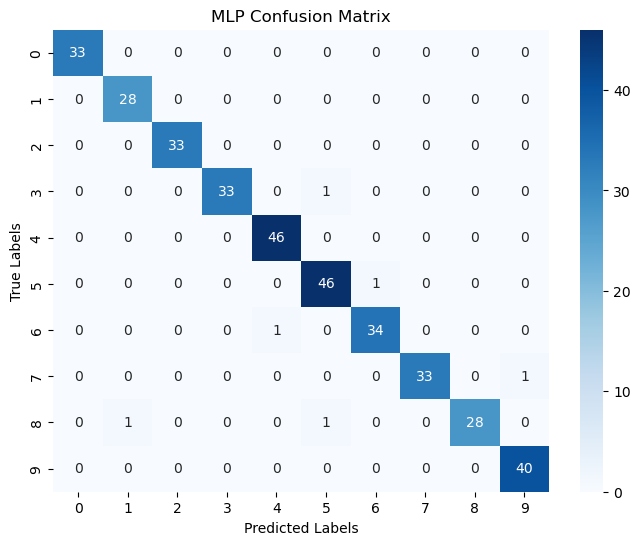

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

# Load dataset (Example: Digits Dataset for multi-class classification)
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
confusion_true_MLP = y_test
confusion_pred_MLP = mlp.predict(X_test)

# Function to calculate metrics and plot confusion matrix
def calculate_metrics_and_plot(true_labels, pred_labels, title):
    """Computes evaluation metrics and plots a confusion matrix."""
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    # Check if arrays are empty
    if len(true_labels) == 0 or len(pred_labels) == 0:
        raise ValueError("Error: No true labels or predictions found. Cannot compute confusion matrix.")

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, pred_labels)

    # Compute classification metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='weighted')

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# Call the function
calculate_metrics_and_plot(confusion_true_MLP, confusion_pred_MLP, 'MLP Confusion Matrix')


In [24]:
train_data_rbp2d = np.array(train_data_rbp)  # Convert to NumPy array if applicable


In [25]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
import tensorflow as tf
import random 
from tensorflow.keras.initializers import GlorotNormal, HeNormal
import matplotlib.pyplot as plt

train_labels=train_labels_s

learning_rate = 0.005  # Learning rate for the optimizer
beta_1 = 0.9  # Exponential decay rate for the first moment estimates
beta_2 = 0.999  # Exponential decay rate for the second moment estimates
epsilon = 1e-7  # A small constant for numerical stability

ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="mean_squared_error", factor=0.3, patience=4, verbose=1, mode="min", min_lr=0.00005)

EarlyStop = tf.keras.callbacks.EarlyStopping(
    monitor="mean_squared_error",patience=10,verbose=1,mode="min",restore_best_weights=True)



num_subjects = len(train_data_rbp)
num_channels = train_data_rbp[0][0].shape[0]
num_frequency_bands = train_data_rbp[0][0].shape[1]

loo = LeaveOneOut()

all_rmse = []
label_pred=[]
label_true=[]

histories_MMSE = []


for subject_idx in range(num_subjects):
    print(f"Leave-One-Subject-Out: Testing on subject {subject_idx + 1}/{num_subjects}")
  
   

    tf.keras.backend.clear_session()
    model_MMSE = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(num_channels, num_frequency_bands)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=HeNormal()),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=HeNormal()),
    tf.keras.layers.Dense(1, activation='linear', kernel_initializer=GlorotNormal()),
   

])
    input_shape = train_data_rbp2d[0][0].shape

    #model_MMSE=create_CNN2D_model(input_shape)
    #model_MMSE = create_LSTM_model(input_shape)
    #model_MMSE=model_CNN_1D_multi_head_BUILD((num_channels, num_frequency_bands))
    
    optimizer_ADAM = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    model_MMSE.compile(optimizer=optimizer_ADAM, loss='mean_squared_error', metrics=['mean_squared_error'])

    train_data = []
    train_labels_concat = []

    # Construct the training set excluding the current subject's epochs
    for idx, data in enumerate(train_data_rbp):
        if idx != subject_idx:
            # Shuffle the indices for data and corresponding labels
            shuffled_indices = list(range(len(data)))
            random.shuffle(shuffled_indices)
            for shuffled_idx in shuffled_indices:
                train_data.extend(data[shuffled_idx])
                # Convert the label to a list before extending
                train_labels_concat.extend([train_labels[idx][shuffled_idx]])
                
    # Reshape the training data to match the model's input shape
    train_data_reshaped = np.array(train_data).reshape(-1, num_channels, num_frequency_bands)

    # Train the model
    history_MMSE = model_MMSE.fit(train_data_reshaped, np.array(train_labels_concat),
                                epochs=20, batch_size=64, verbose=1, callbacks=[EarlyStop, ReduceLR])
    histories_MMSE.append(history_MMSE)

    # Test on the current subject's epochs
    test_data = np.array(train_data_rbp[subject_idx]).reshape(-1, num_channels, num_frequency_bands)
    test_labels_concat = np.array(train_labels[subject_idx])

    # Predict on test data
    test_pred = model_MMSE.predict(test_data)

    # Calculate RMSE manually
    test_rmse = np.sqrt(np.mean((test_pred.flatten() - test_labels_concat)**2))
    
    label_pred.append(test_pred.flatten())
    label_true.append(test_labels_concat)

    print(f"Test RMSE: {test_rmse:.4f}")
    print("=" * 30)

    all_rmse.append(test_rmse)
    

average_rmse = np.mean(all_rmse)
print(f"Average Test RMSE: {average_rmse:.4f}")
print("Leave-One-Subject-Out validation complete.")

Leave-One-Subject-Out: Testing on subject 1/10
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 15.7184 - mean_squared_error: 15.7184 - lr: 0.0050
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 17.5737 - mean_squared_error: 17.5737 - lr: 0.0050
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 18.7727 - mean_squared_error: 18.7727 - lr: 0.0050
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 14.4194 - mean_squared_error: 14.4194 - lr: 0.0050
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 14.5604 - mean_squared_error: 14.5604 - lr: 0.0050
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 14.5168 - mean_squared_error: 14.5168 - lr: 0.0050
Epoch 7/20
1/1 [==============================] - 0s 17ms/step - loss: 14.5541 - mean_squared_error: 14.5541 - lr: 0.0050
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 12.7622 - mean_squared_error: 12.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


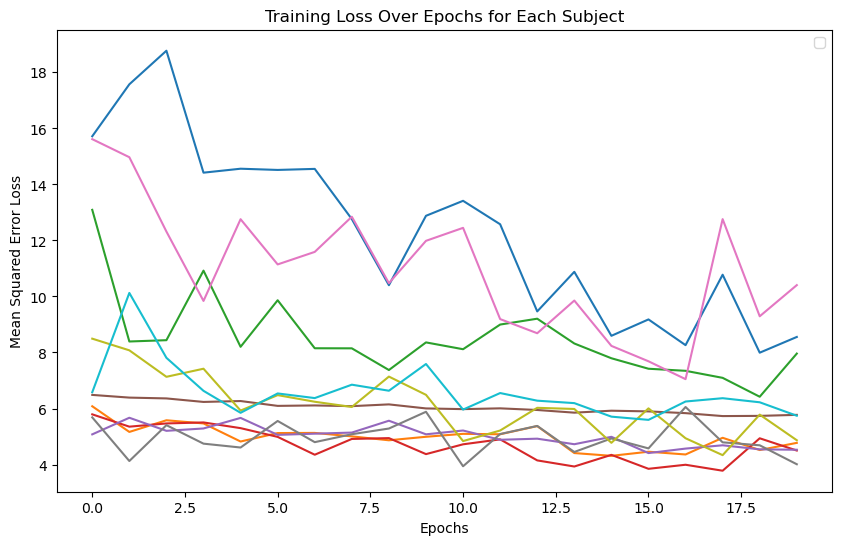

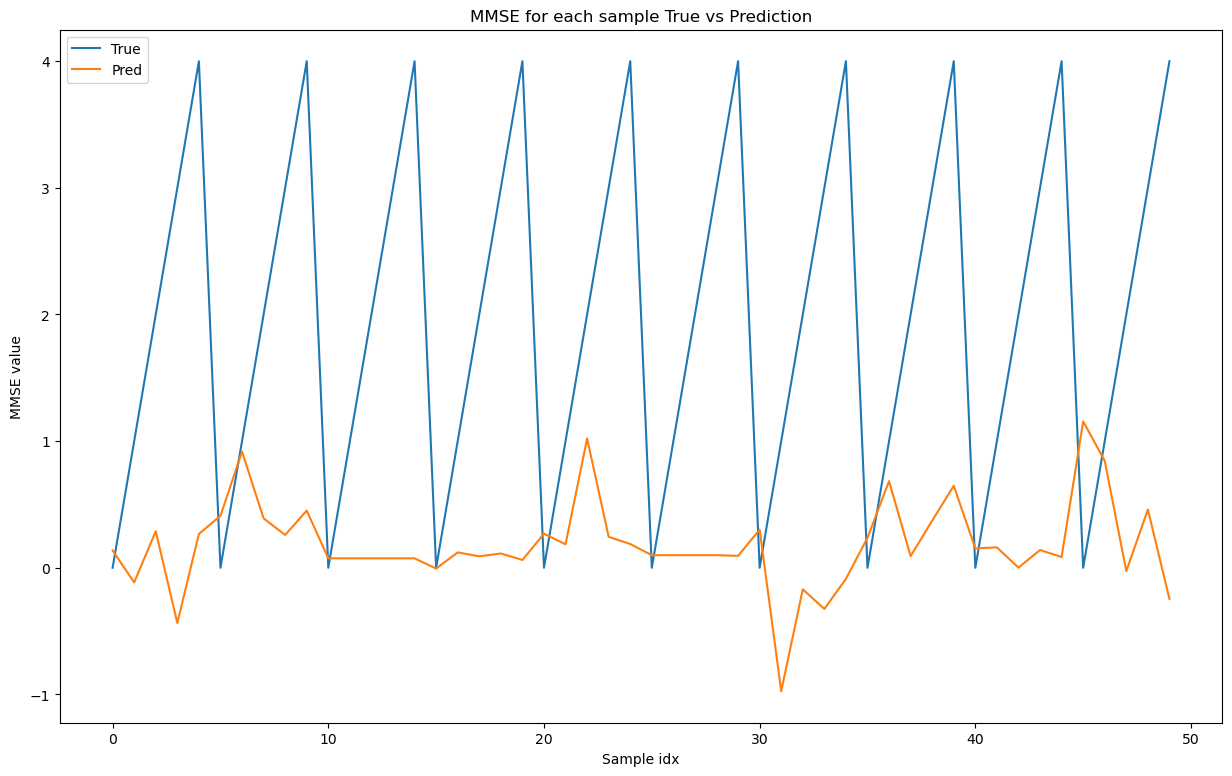

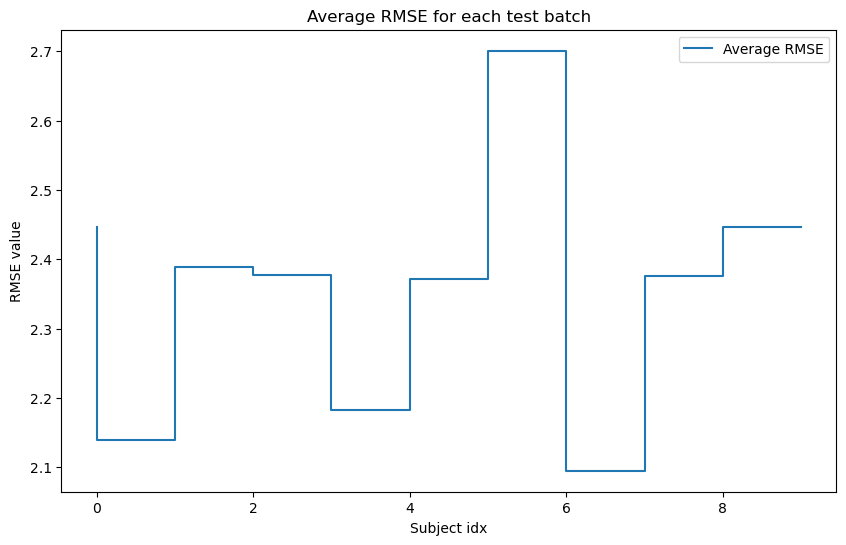

In [26]:
# Plot the training loss for each iteration
plt.figure(figsize=(10, 6))
for history in histories_MMSE:
    plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss Over Epochs for Each Subject')
plt.legend()
plt.show()
# ... (your existing code)

# Plot all samples' predictions and actual labels
plt.figure(figsize=(15, 9))

#for subject_idx in range(num_subjects):
    # Plot predictions and actual labels for each subject with different colors
 #   plt.scatter(label_true[subject_idx], label_pred[subject_idx], label=f'Subject {subject_idx + 1}', alpha=0.7)
#for x in label_pred:
#    print(x)
vix_true =  np.concatenate(label_true, axis=0)
vix_pred =  np.concatenate(label_pred, axis=0)

plt.plot(vix_true)
plt.plot(vix_pred)

plt.xlabel('Sample idx')
plt.ylabel('MMSE value')
plt.title('MMSE for each sample True vs Prediction')
plt.legend(['True','Pred'])
plt.show()

plt.figure(figsize=(10, 6))

plt.step(range(len(all_rmse)),all_rmse)

plt.xlabel('Subject idx')
plt.ylabel('RMSE value')
plt.title('Average RMSE for each test batch')
plt.legend(['Average RMSE'])
plt.show()

Leave-One-Subject-Out validation complete.
Accuracy: 0.9833
Precision: 0.9837
Recall: 0.9833
F1-score: 0.9833


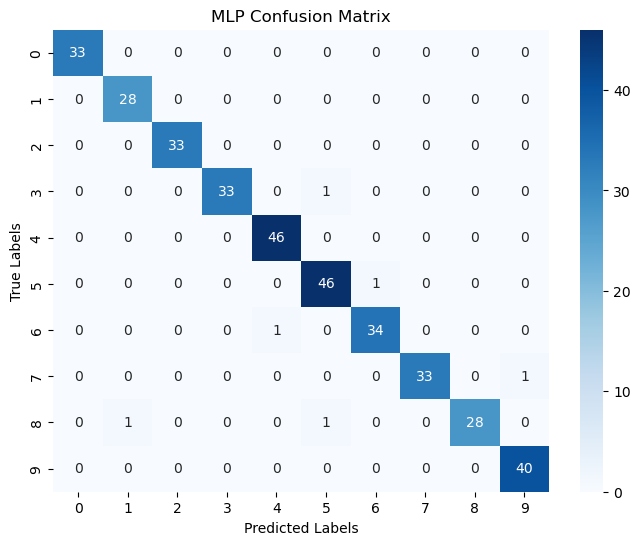

In [30]:
print("Leave-One-Subject-Out validation complete.")
calculate_metrics_and_plot(confusion_true_MLP, confusion_pred_MLP,'MLP Confusion Matrix')

In [31]:
print(train_data_rbp2d[0][0].shape)

(3, 2)


In [37]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
import tensorflow as tf
import random

train_labels=train_labels_s

num_subjects = len(train_data_rbp)
num_epochs = train_data_rbp2d[0].shape[0]
num_channels = train_data_rbp2d[0].shape[1]
num_frequency_bands = train_data_rbp2d[0].shape[2]


learning_rate = 0.001  # Learning rate for the optimizer
beta_1 = 0.9  # Exponential decay rate for the first moment estimates
beta_2 = 0.999  # Exponential decay rate for the second moment estimates
epsilon = 1e-7  # A small constant for numerical stability

ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="accuracy", factor=0.3, patience=4, verbose=1, mode="max", min_lr=0.00005)

EarlyStop = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",patience=10,verbose=1,mode="max",restore_best_weights=True)

optimizer_ADAM = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
# ... (Assume train_data_rbp2d, train_labels, learning_rate, beta_1, beta_2, epsilon, ReduceLR, EarlyStop are defined)

num_subjects = len(train_data_rbp2d)

loo = LeaveOneOut()

average_accuracy = []

confusion_true_CNN2D = []
confusion_pred_CNN2D = []  # Changed from confusion_pred_MLP

histories_CNN2D = []  # Changed from histories_MLP

for subject_idx in range(num_subjects):
    print(f"Leave-One-Subject-Out: Testing on subject {subject_idx + 1}/{num_subjects}")

    tf.keras.backend.clear_session()

    # Define the CNN2D model
       # Assuming input_shape is the shape of your input data
    input_shape = train_data_rbp2d[0][0].shape
    print(input_shape)

    model_CNN2D=create_CNN2D_model(input_shape)
    optimizer_ADAM = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    model_CNN2D.compile(optimizer=optimizer_ADAM, loss='binary_crossentropy', metrics=['accuracy'])
    
    train_data_concat = []
    train_labels_concat = []
    # Construct the training set excluding current subject's data
    for idx, data in enumerate(train_data_rbp2d):
        if idx != subject_idx:
            # Concatenate data along the first axis (axis=0)
            train_data_concat.extend(data)
            # Concatenate labels
            train_labels_concat.extend(train_labels[idx])

    # Concatenate the lists of arrays to create final numpy arrays
    
    #train_data_concatenated = np.concatenate(train_data_concat, axis=0)
    #train_data_concatenated=np.array(train_data_concat)
    train_labels_concatenated = np.array(train_labels_concat)

    # Reshape the training data to match the model's input shape
    #train_data_reshaped = train_data_concatenated.reshape(-1, num_channels, num_frequency_bands, 1)
    train_data_reshaped = np.array(train_data_concat).reshape(-1, num_channels, num_frequency_bands,1)
    print(train_data_reshaped.shape)
    # Train the CNN2D model
    history_CNN2D = model_CNN2D.fit(train_data_reshaped, train_labels_concatenated,
                                     epochs=15, batch_size=64, verbose=0, callbacks=[EarlyStop, ReduceLR])

    histories_CNN2D.append(history_CNN2D)

    # Test on the current subject's data
    test_data = np.array(train_data_rbp2d[subject_idx])
    test_labels = np.array(train_labels[subject_idx])

    # Predict using the CNN2D model
    test_pred = model_CNN2D.predict(test_data)

    # Convert predictions to binary (0 or 1) based on a threshold (0.5 for example)
    threshold = 0.5
    test_pred_binary = (test_pred > threshold).astype(int)

    # Calculate accuracy manually
    test_acc = np.mean(test_pred_binary.flatten() == test_labels)

    print(f"Test Accuracy: {test_acc:.4f}")
    print("=" * 30)

    average_accuracy.append(test_acc)

    confusion_true_CNN2D.extend(test_labels)  # Changed from confusion_true_MLP
    confusion_pred_CNN2D.extend(test_pred_binary.flatten())  # Changed from confusion_pred_MLP

average_accuracy = np.mean(average_accuracy)
print(f"Average Test Accuracy: {average_accuracy:.4f}")
print("Leave-One-Subject-Out validation complete.")

Leave-One-Subject-Out: Testing on subject 1/10
(3, 2, 1)
(45, 3, 2, 1)

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1/1 [==============================] - 0s 113ms/step
Test Accuracy: 0.2000
Leave-One-Subject-Out: Testing on subject 2/10
(3, 2, 1)
(45, 3, 2, 1)

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 10: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping
1/1 [==============================] - 0s 112ms/step
Test Accuracy: 0.2000
Leave-One-Subject-Out: Testing on subject 3/10
(3, 2, 1)
(45, 3, 2, 1)

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 14: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
1/1 [==============================] - 0s 79ms/step
Test Accuracy: 0.2000
Leave-One-Subject-Out: Testing on subject 4/10
(3, 2, 1)
(45, 3, 2, 1)

Epoch 9: ReduceLRO

Accuracy: 0.2000
Precision: 0.0777
Recall: 0.2000
F1-score: 0.1096


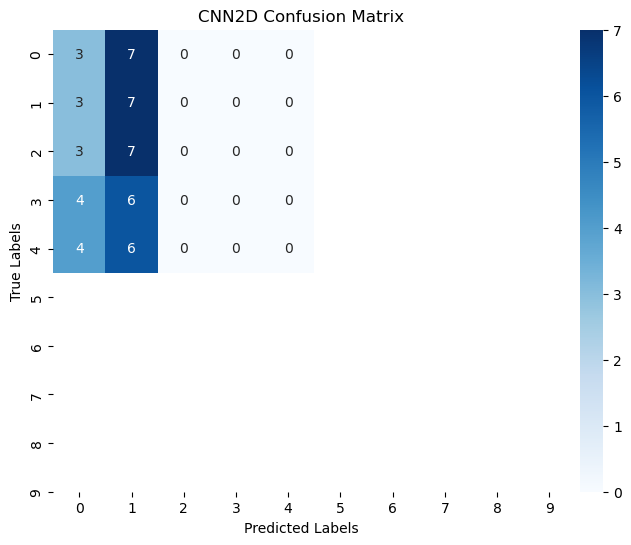

In [38]:
calculate_metrics_and_plot(confusion_true_CNN2D, confusion_pred_CNN2D,'CNN2D Confusion Matrix')

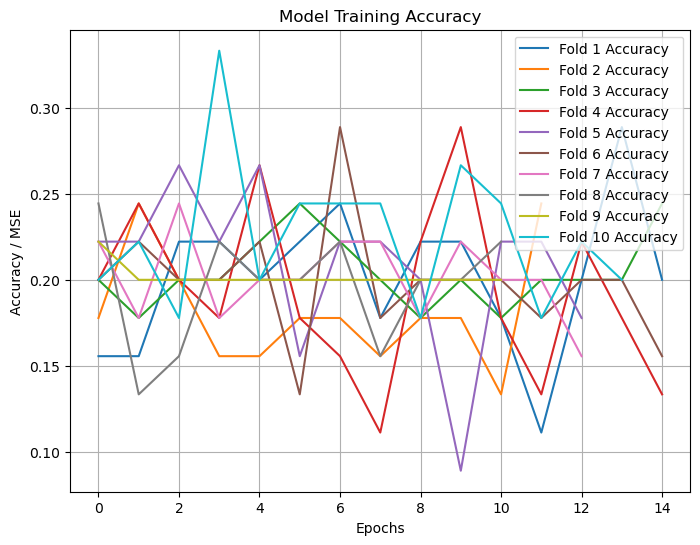

In [39]:
plot_accuracy(histories_CNN2D)

1/1 [==============================] - 0s 23ms/step


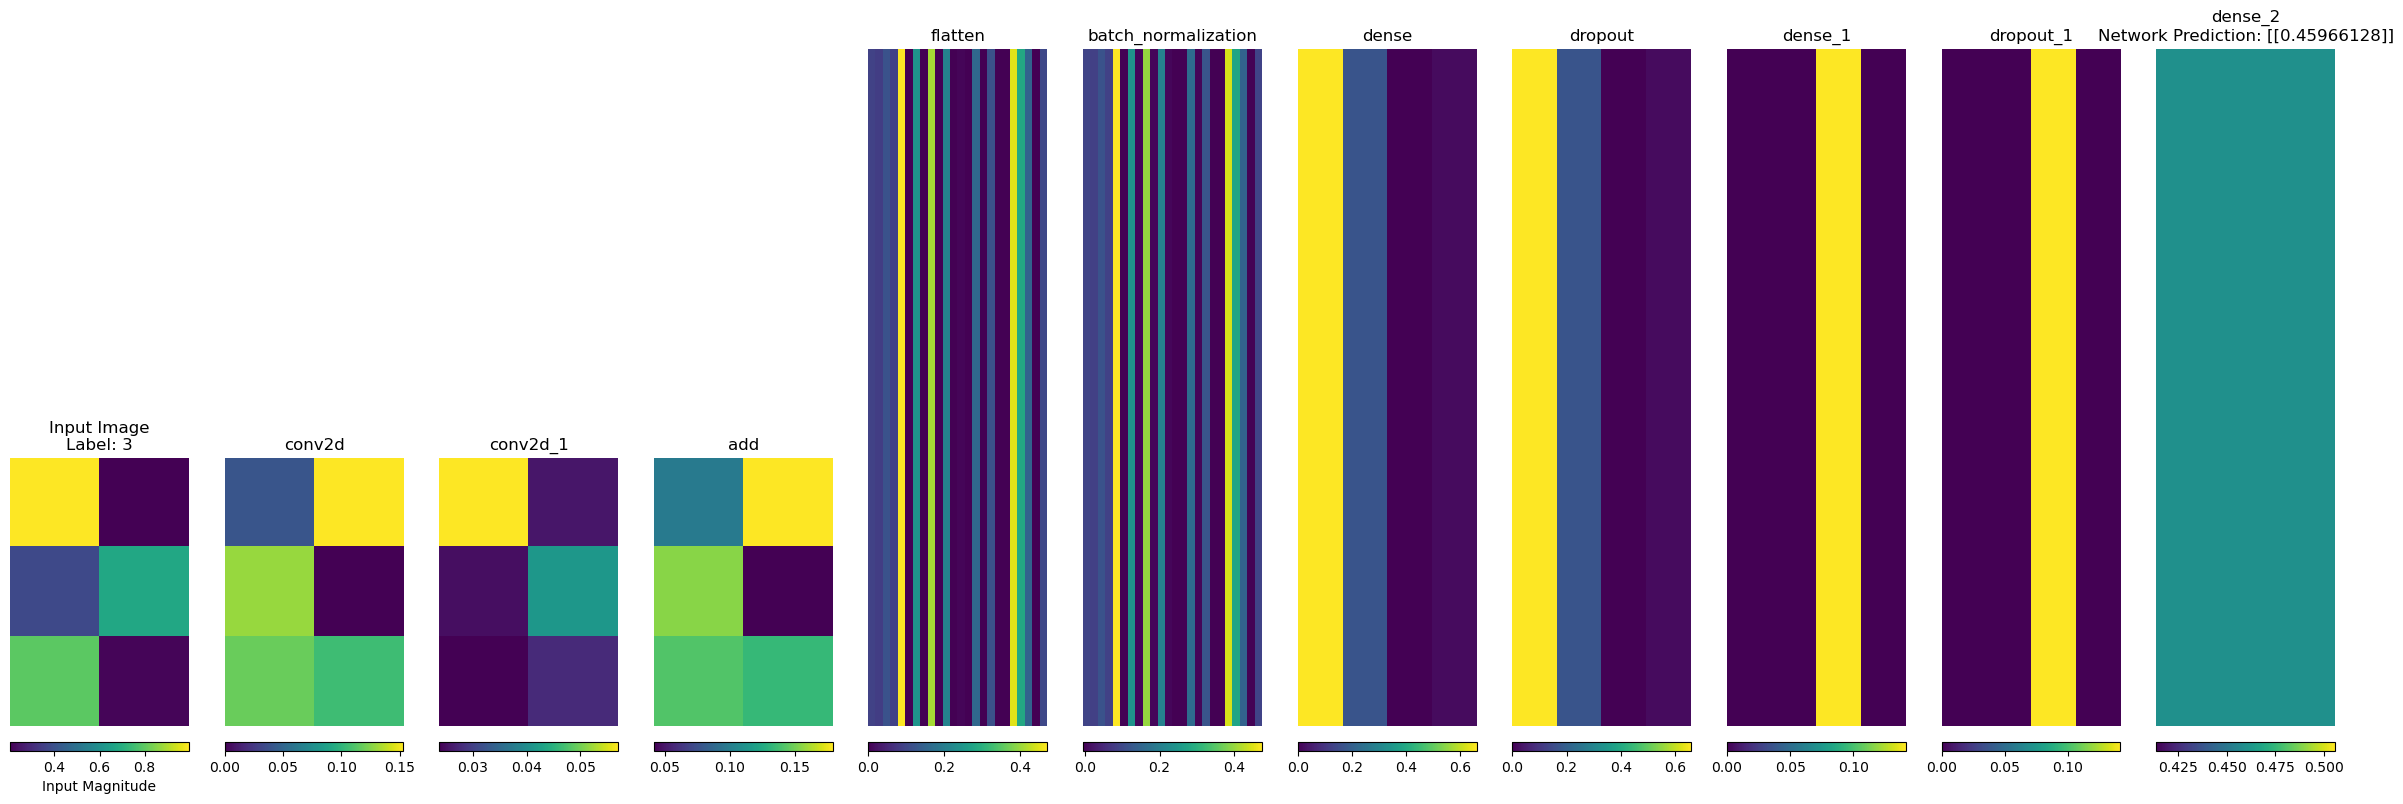

In [40]:
def visualize_activation_maps(model, samples, labels, colormap):
    random_subject_index = np.random.randint(len(samples))
    random_epoch_index = np.random.randint(samples[random_subject_index].shape[0])
    sample = np.expand_dims(samples[random_subject_index][random_epoch_index], axis=0)  # Random subject and epoch
    label = labels[random_subject_index][random_epoch_index]  # Corresponding label

    layer_outputs = [layer.output for layer in model.layers[1:]]  # Skip input layer and flatten layer
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(sample)

    # Original sample
    plt.figure(figsize=(30, 10))
    
    plt.subplot(1, len(activations) + 1, 1)
    plt.imshow(np.squeeze(sample[0]), cmap=colormap)
    plt.title('Input Image\nLabel: {}'.format(label))
    plt.axis('off')
    # Add a colorbar to explain magnitudes of the displayed colors
    cbar = plt.colorbar(orientation='horizontal', fraction=0.1, pad=0.02)
    cbar.set_label('Input Magnitude')  # You can customize the colorbar label if needed


    # Activation maps for each layer
    for i, (layer_name, activation_map) in enumerate(zip([layer.name for layer in model.layers[1:]], activations)):
        plt.subplot(1, len(activations) + 1, i + 2)
        if len(activation_map.shape) == 4:  # 4D activation map (batch_size, width, height, channels)
            # Average activation across channels
            avg_activation = np.mean(activation_map[0], axis=-1)
            plt.imshow(avg_activation, cmap=colormap)
            plt.colorbar(orientation='horizontal', fraction=0.1, pad=0.02)
        elif len(activation_map.shape) == 2:  # 2D activation map (batch_size, features)
            plt.imshow(np.expand_dims(activation_map[0], axis=0), cmap=colormap, aspect='auto')
            plt.colorbar(orientation='horizontal', fraction=0.1, pad=0.02)
        plt.title(layer_name)
        plt.axis('off')

    # Print the network prediction under the title of the last activation map
    prediction = model.predict(sample)
    plt.title('{}\nNetwork Prediction: {}'.format(layer_name, prediction))
    
    # Add a colorbar to explain magnitudes of the displayed colors
    #cbar2 = plt.colorbar(orientation='horizontal', fraction=0.1, pad=0.02)
    #cbar2.set_label('Prediction Magnitude')  # You can customize the colorbar label if needed

    plt.show()

# Example usage
colormap = 'viridis'

visualize_activation_maps(model_CNN2D, train_data_rbp2d, train_labels_s, colormap)

In [52]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
import tensorflow as tf
import random

train_labels=train_labels_s

num_subjects = len(train_data_rbp)
num_epochs = train_data_rbp[0].shape[0]
num_channels = train_data_rbp[0].shape[1]
num_frequency_bands = train_data_rbp[0].shape[2]

average_accuracy_RNN = []
confusion_true_RNN = []
confusion_pred_RNN = []
histories_RNN = []

learning_rate = 0.005  # Learning rate for the optimizer
beta_1 = 0.9  # Exponential decay rate for the first moment estimates
beta_2 = 0.999  # Exponential decay rate for the second moment estimates
epsilon = 1e-7  # A small constant for numerical stability

ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="accuracy", factor=0.3, patience=4, verbose=1, mode="max", min_lr=0.00005)

EarlyStop = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",patience=10,verbose=1,mode="max",restore_best_weights=True)

optimizer_ADAM = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
# ... (Assume train_data_rbp2d, train_labels, learning_rate, beta_1, beta_2, epsilon, ReduceLR, EarlyStop are defined)

for subject_idx in range(num_subjects):
    print(f"Leave-One-Subject-Out: Testing on subject {subject_idx + 1}/{num_subjects}")

    tf.keras.backend.clear_session()

    # RNN Model
    model_RNN = tf.keras.Sequential([
    tf.keras.layers.Reshape((1, num_channels * num_frequency_bands), input_shape=(num_channels, num_frequency_bands)),
    tf.keras.layers.BatchNormalization(),
    
    # First SimpleRNN layer
    tf.keras.layers.LSTM(8, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.5),

    # Second SimpleRNN layer
    tf.keras.layers.LSTM(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Fully connected layer
    tf.keras.layers.Flatten(),
   
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=HeNormal()),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=HeNormal()),
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer=GlorotNormal()) 
    ])


    optimizer_ADAM = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

    # Compile RNN Model
    model_RNN.compile(optimizer=optimizer_ADAM, loss='binary_crossentropy', metrics=['accuracy'])

    train_data = []
    train_labels_concat = []

    # Construct the training set excluding current subject's epochs
    for idx, data in enumerate(train_data_rbp):
        if idx != subject_idx:
            # Shuffle the indices for data and corresponding labels
            shuffled_indices = list(range(len(data)))
            random.shuffle(shuffled_indices)
            for shuffled_idx in shuffled_indices:
                train_data.extend(data[shuffled_idx])
                # Convert the label to a list before extending
                train_labels_concat.extend([train_labels[idx][shuffled_idx]])

    # Reshape the training data to match the model's input shape
    train_data_reshaped = np.array(train_data).reshape(-1, num_channels, num_frequency_bands)

    # Train RNN Model
    history_RNN = model_RNN.fit(train_data_reshaped, np.array(train_labels_concat),
                                epochs=20, batch_size=64, verbose=0, callbacks=[EarlyStop, ReduceLR])
    histories_RNN.append(history_RNN)

    # Test on the current subject's epochs
    test_data = np.array(train_data_rbp[subject_idx]).reshape(-1, num_channels, num_frequency_bands)
    test_labels_concat = np.array(train_labels[subject_idx])

    # Predict on test data for RNN
    test_pred_RNN = model_RNN.predict(test_data)
    threshold_RNN = 0.5
    test_pred_binary_RNN = (test_pred_RNN > threshold_RNN).astype(int)
    
    confusion_true_RNN.extend(test_labels_concat)  # Changed from confusion_true_MLP
    confusion_pred_RNN.extend(test_pred_binary_RNN.flatten())  # Changed from confusion_pred_MLP


    # Calculate accuracy manually for RNN
    test_acc_RNN = np.mean(test_pred_binary_RNN == test_labels_concat)
    print(f"RNN Test Accuracy: {test_acc_RNN:.4f}")

    print("=" * 30)

    average_accuracy_RNN.append(test_acc_RNN)

average_accuracy_RNN = np.mean(average_accuracy_RNN)
print(f"Average RNN Test Accuracy: {average_accuracy_RNN:.4f}")
print("Leave-One-Subject-Out validation complete.")

Leave-One-Subject-Out: Testing on subject 1/10

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0014999999664723873.

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00045000000391155477.
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
1/1 [==============================] - 1s 738ms/step
RNN Test Accuracy: 0.2000
Leave-One-Subject-Out: Testing on subject 2/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0014999999664723873.

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00045000000391155477.
Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping
1/1 [==============================] - 0s 457ms/step
RNN Test Accuracy: 0.2000
Leave-One-Subject-Out: Testing on subject 3/10

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0014999999664723873.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00045000000391155477.
Restoring model weights from the end of the best epoch: 6.
Epoch 

Accuracy: 0.2000
Precision: 0.0400
Recall: 0.2000
F1-score: 0.0667


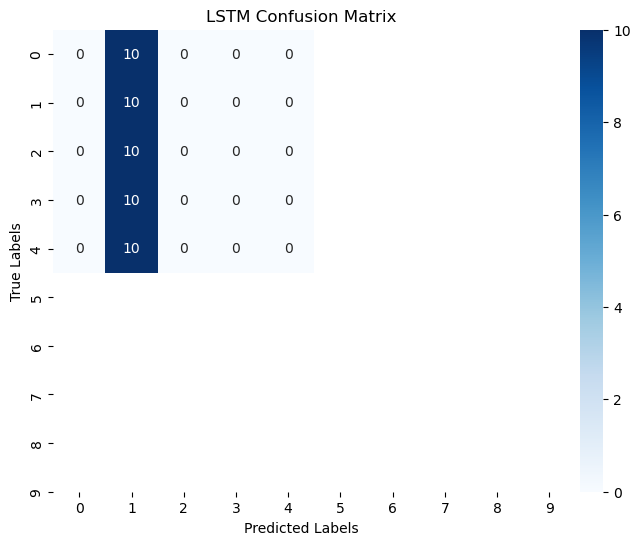

In [53]:
calculate_metrics_and_plot(confusion_true_RNN, confusion_pred_RNN,'LSTM Confusion Matrix')

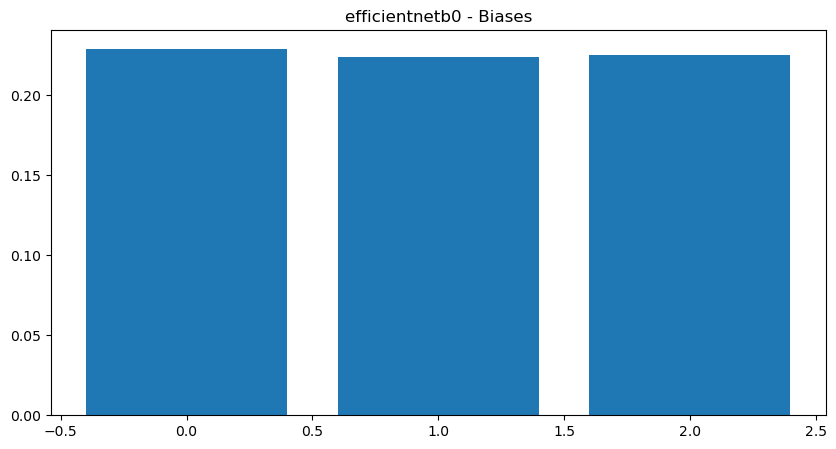

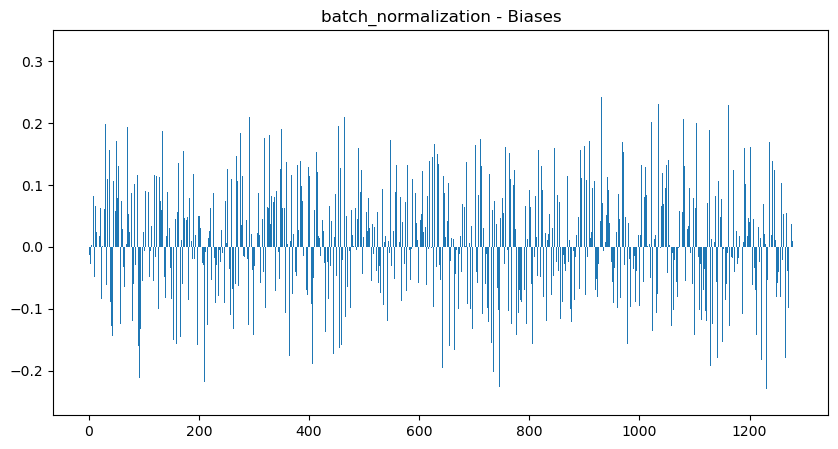

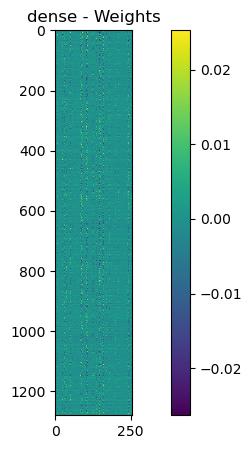

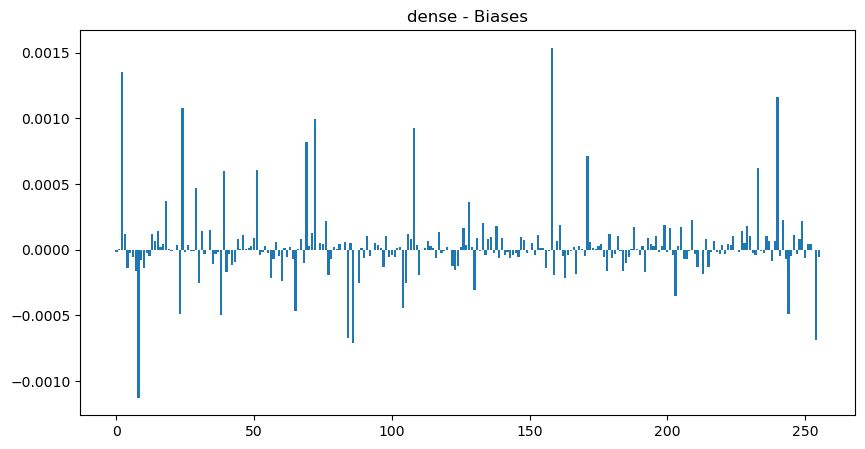

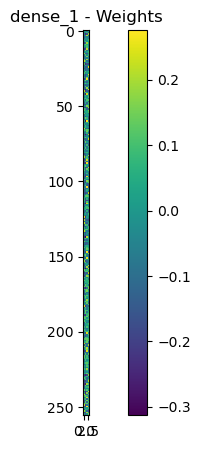

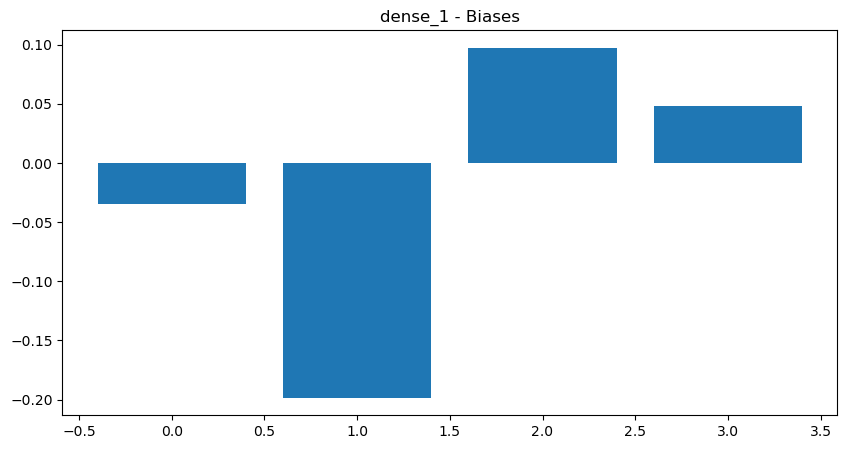

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your trained model (replace 'model.h5' with the actual path)
model_RNN = load_model('model.h5')

# Get the list of layers in the model
layers = model_RNN.layers

# Iterate through each layer to visualize its weights and biases
for layer in layers:
    weights = layer.get_weights()  # Extract weights and biases
    
    if len(weights) > 0:  # If the layer has weights
        w = weights[0]  # Extract weights (ignoring biases for now)
        w_shape = w.shape

        if len(w_shape) == 2:
            # 2D weights (Dense layer)
            plt.figure(figsize=(10, 5))
            plt.imshow(w, cmap='viridis', interpolation='none')
            plt.title(f'{layer.name} - Weights')
            plt.colorbar()
            plt.show()

        elif len(w_shape) == 3 or len(w_shape) == 4:
            # 3D or 4D weights (Convolutional layer)
            num_filters = w.shape[-1]  # Number of filters in Conv layer
            fig, axes = plt.subplots(1, min(num_filters, 4), figsize=(10, 5))  # Show up to 4 filters

            for i in range(min(num_filters, 4)):
                ax = axes[i] if num_filters > 1 else axes
                ax.imshow(w[:, :, :, i].squeeze(), cmap='viridis', interpolation='none')
                ax.set_title(f'{layer.name} - Filter {i+1}')
                ax.axis('off')

            plt.show()

        # Visualize biases if available
        if len(weights) > 1:
            biases = weights[1]  # Biases
            plt.figure(figsize=(10, 5))
            plt.bar(range(len(biases)), biases)
            plt.title(f'{layer.name} - Biases')
            plt.show()


Accuracy: 1.0
Precision: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
F1-score: 1.0


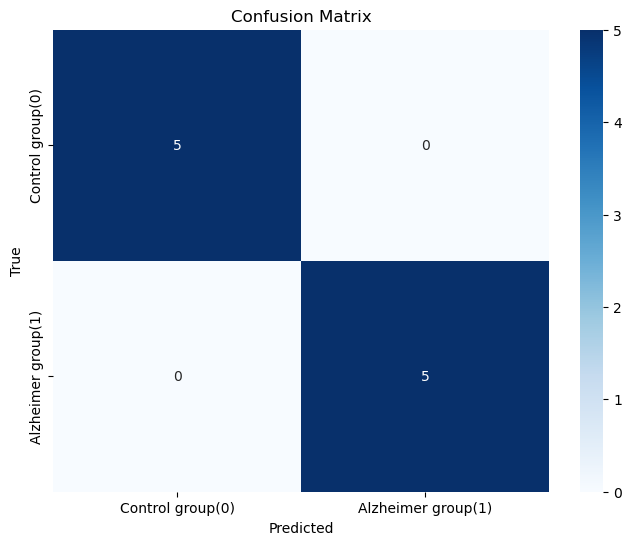

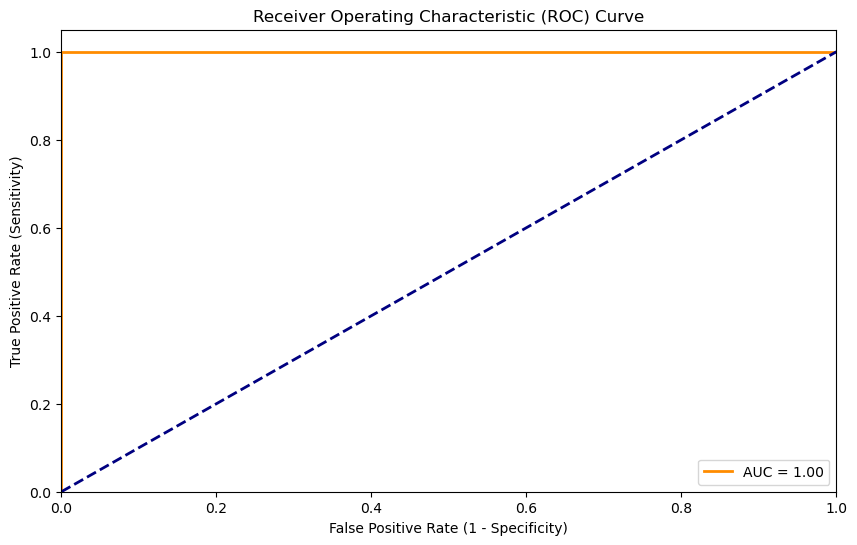

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc
)

# Example placeholders (replace with actual values)
true_labels = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])  # Replace with actual test labels
predictions = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])  # Replace with actual model predictions
predictions_prob = np.array([0.1, 0.9, 0.3, 0.8, 0.7, 0.2, 0.85, 0.15, 0.95, 0.05])  # Probabilities for class 1

# Flatten arrays if they are nested
true_labels_flat = np.ravel(true_labels)
predictions_flat = np.ravel(predictions)
predictions_prob_flat = np.ravel(predictions_prob)

# Compute confusion matrix
confusion_mtx = confusion_matrix(true_labels_flat, predictions_flat)

# Define class names
class_names = ["Control group(0)", "Alzheimer group(1)"]

# Compute performance metrics
accuracy = accuracy_score(true_labels_flat, predictions_flat)
precision = precision_score(true_labels_flat, predictions_flat)
recall = recall_score(true_labels_flat, predictions_flat)
f1 = f1_score(true_labels_flat, predictions_flat)
specificity = confusion_mtx[0, 0] / (confusion_mtx[0, 0] + confusion_mtx[0, 1])

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", specificity)
print("F1-score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(true_labels_flat, predictions_prob_flat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [24]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 6s 701ms/step - loss: 1.0983 - accuracy: 0.7188
Train Loss:  0.1666252762079239
Train Accuracy:  0.9921875
--------------------
Validation Loss:  1.0156519412994385
Validation Accuracy:  0.734375
--------------------
Test Loss:  1.0983226299285889
Test Accuracy:  0.71875


32/32 [==============================] - 24s 666ms/step


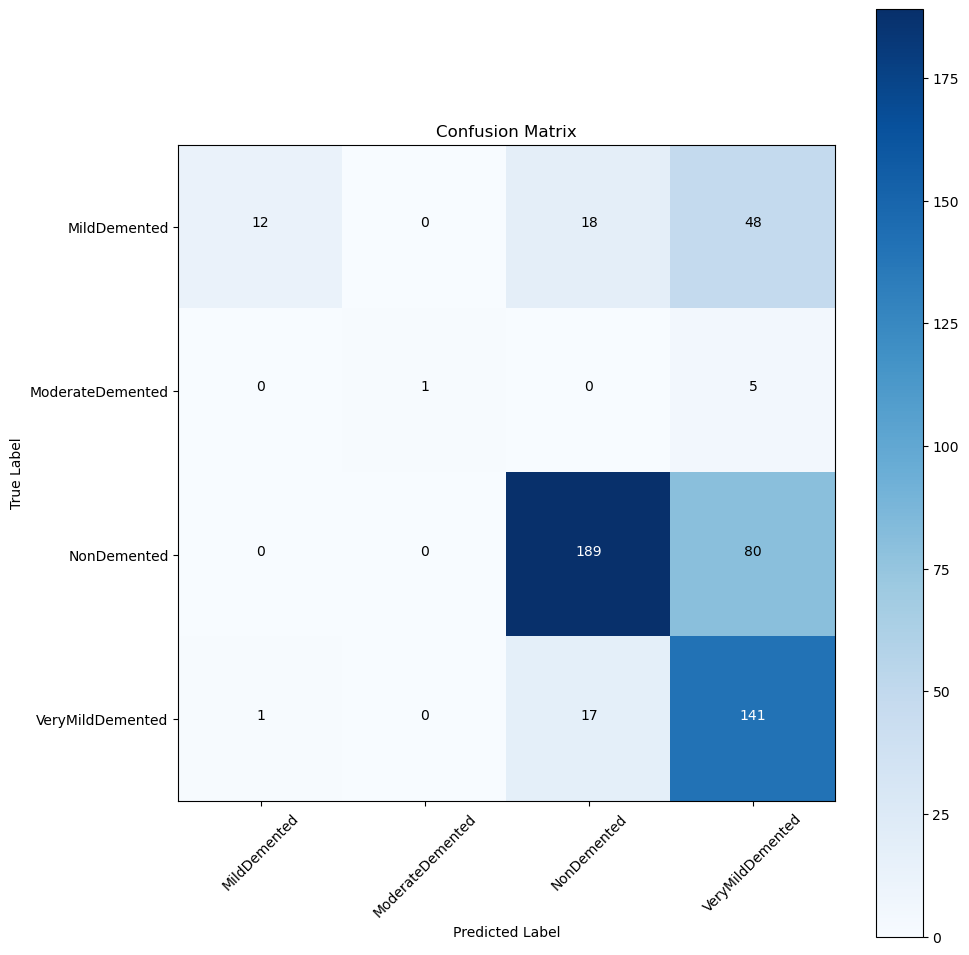

In [26]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained model
y_pred_prob = model.predict(test_gen)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert to class labels

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, str(cm[i, j]), horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [27]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

    MildDemented       0.92      0.15      0.26        78
ModerateDemented       1.00      0.17      0.29         6
     NonDemented       0.84      0.70      0.77       269
VeryMildDemented       0.51      0.89      0.65       159

        accuracy                           0.67       512
       macro avg       0.82      0.48      0.49       512
    weighted avg       0.76      0.67      0.65       512



In [28]:
#Save the model
model.save('model.h5')

C:\Users\91941\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax

# Verify the current working directory (Equivalent to `pwd`)
print("Current Directory:", os.getcwd())

# List files in the current directory (Equivalent to `ls`)
print("Files in Directory:", os.listdir())

# Load the model
model_path = 'model.h5'

# Check if the model file exists
if os.path.exists(model_path):
    loaded_model = tf.keras.models.load_model(model_path, compile=False)
    loaded_model.compile(optimizer=Adamax(learning_rate=0.001), 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])
    print("Model loaded and compiled successfully!")
else:
    print(f"Error: Model file '{model_path}' not found!")

Current Directory: C:\Users\91941\Documents\python vishank
Files in Directory: ['.ipynb_checkpoints', 'alzheimer-diseases-3-class.csv', 'alzheimer3sem.ipynb', 'alzheimerproject.ipynb', 'lung cancer.ipynb', 'model.h5']
Model loaded and compiled successfully!


1/1 [==============================] - 4s 4s/step


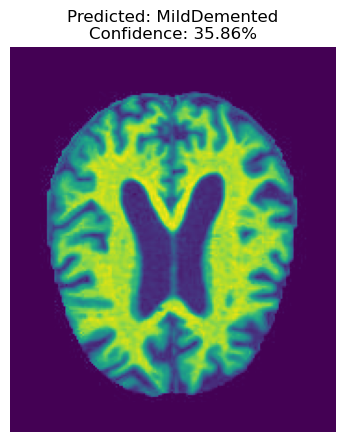

In [30]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test\MildDemented'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(folder_path, image_files[0])  # Load the first image
    image = Image.open(image_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Ensure `classes` is defined before using it
    class_labels = classes  # Replace with your actual class labels list

    # Get the predicted class
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {100 * np.max(score):.2f}%")
    plt.show()

else:
    print("Error: No image files found in the directory!")

1/1 [==============================] - 0s 109ms/step


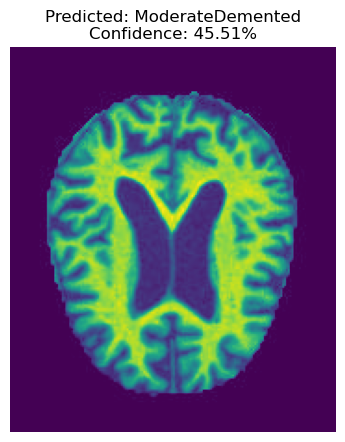

In [31]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test\ModerateDemented'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(folder_path, image_files[0])  # Load the first image
    image = Image.open(image_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Ensure `classes` is defined before using it
    class_labels = classes  # Replace with your actual class labels list

    # Get the predicted class
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {100 * np.max(score):.2f}%")
    plt.show()

else:
    print("Error: No image files found in the directory!")

1/1 [==============================] - 0s 72ms/step


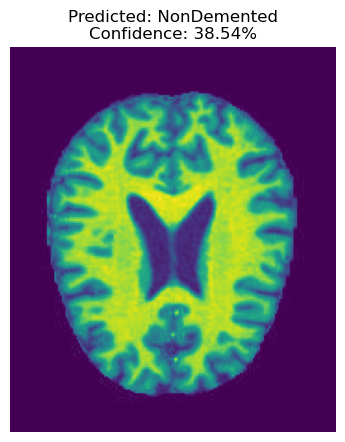

In [32]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test\NonDemented'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(folder_path, image_files[0])  # Load the first image
    image = Image.open(image_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Ensure `classes` is defined before using it
    class_labels = classes  # Replace with your actual class labels list

    # Get the predicted class
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {100 * np.max(score):.2f}%")
    plt.show()

else:
    print("Error: No image files found in the directory!")

1/1 [==============================] - 0s 76ms/step


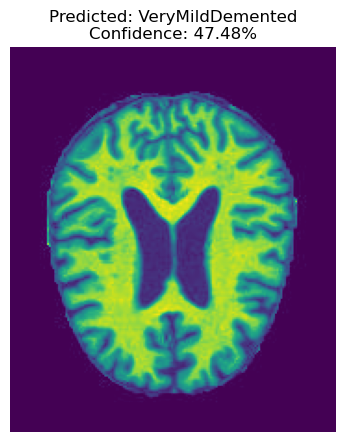

In [33]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r'C:\Users\91941\OneDrive - Amity University\Desktop\Alzheimer_s Dataset\test\VeryMildDemented'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    image_path = os.path.join(folder_path, image_files[0])  # Load the first image
    image = Image.open(image_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Ensure `classes` is defined before using it
    class_labels = classes  # Replace with your actual class labels list

    # Get the predicted class
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {100 * np.max(score):.2f}%")
    plt.show()

else:
    print("Error: No image files found in the directory!")